This is the simple mock galaxy catalog made of randomly shaped and placed galaxies for testing purposes

In [3]:
import ngmix
from ngmix.medsreaders import NGMixMEDS
import numpy as np
import os
import time
from astropy.table import Table, vstack, hstack

import pickle
import numpy as np
import pandas as pd

import sklearn.neighbors as neighbors

from importlib import reload
import copy
import synthetic.render.generator as gen

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import multiprocessing as mp

import sys
import os
import math
import logging
import time
import galsim
import fitsio as fio

import ngmix

import synthetic.render.render as render
import synthetic.render.icl as icl
import synthetic.render.frame as frame
import synthetic.mcal as mcal

# import images
import meds
import subprocess
import psfex

In [4]:
def toflux(mag):
    flux = 10**((mag - 30)/-2.5)
    return flux

In [5]:
20 * 20

400

In [6]:
np.sqrt(40000)

200.0

In [20]:
np.random.seed(5000)
nobjects = 40000
canvas_size = 10000
padding = 40
mock_catalog = pd.DataFrame()


x = np.linspace(padding, canvas_size - padding, 200)
y = np.linspace(padding, canvas_size - padding, 200)
xx, yy = np.meshgrid(x, y)
xx = xx.flatten()
yy = yy.flatten()


# this is something of an artifact, the X, Y is starting at 0, not at the image center... might need to be fixed
mock_catalog["X"] = xx
mock_catalog["Y"] = yy
lsizes = np.random.normal(loc=0.4, scale=0.2, size=nobjects)
mock_catalog["TSIZE"] = 10 # 10**(lsizes - 1) * 2
mock_catalog["FRACDEV"] = 1 #np.random.uniform(0, 1, size=nobjects)
mock_catalog["MAG_I"] = 21 #np.random.normal(loc=22, scale=0.5, size=nobjects)
mock_catalog["FLUX_I"] = toflux(mock_catalog["MAG_I"])
mock_catalog["G1"] = np.random.normal(loc=0, scale=0.25, size=nobjects) + 0.02
mock_catalog["G2"] = np.random.normal(loc=0, scale=0.25, size=nobjects) - 0.02
g1 = mock_catalog["G1"]
g2 = mock_catalog["G2"]
amp = np.sqrt(g1**2 + g2**2) 
ii = amp > 0.8
mock_catalog['G1'][ii] *= 0.8 / amp[ii]
mock_catalog['G2'][ii] *= 0.8 / amp[ii]
g1 = mock_catalog["G1"]
g2 = mock_catalog["G2"]
amp = np.sqrt(g1**2 + g2**2) 
# mock_catalog[""]
# ii


# ra = (mock_catalog['X'] - canvas_size) * 0.264 / 60 # arcmin
# dec = (mock_catalog['Y'] - canvas_size) * 0.264 / 60 # arcmin
# dists = np.sqrt(ra**2 + dec**2)
# shears = np.sqrt(1 / dists  / 2) # just for illustration purposes
# shears[shears > 0.8] = 0.8

# phis =  np.arctan2(dec, ra)
# es1 = (-1. * shears * np.cos(2 * phis))
# es2 = (-1. * shears * np.sin(2 * phis))
# mock_catalog["G1"] = es1
# mock_catalog["G2"] = es2

/home/moon/vargatn/anaconda3/envs/galsim/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/moon/vargatn/anaconda3/envs/galsim/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [21]:
mock_catalog["TSIZE"].shape

(40000,)

In [22]:
name = 'test_canvas_grid'
print(name)
fr = frame.Frame(mock_catalog, name=name, noise_std=1, canvas_size=canvas_size)
fr.render()
fr.extract()

test_canvas_grid
starting xshear calculations in 100 processes
sex test_canvas_grid.fits -c config.sex -CATALOG_NAME test_canvas_grid_cat.fits -CHECKIMAGE_NAME test_canvas_grid_seg.fits


In [23]:
fr.scat

array([(1.1773029 , 0.63626861, 2582.9065,   40.46736 ,     1, 21.22209 , 0.00655039, 21.168888, 0.00741701, 22.37894 , 0.00494938, 21.17492 , 0.00788331, 21.17492 , 0.00788331, 3388.6934, 24.598627, 3388.6934, 24.598627, 3244.6226, 19.570478, 3.7020268, 0.25414082, 1.7298021, 84.20063 , 259, 31.84229469,  4.40812804, -5.4585564 ,   35,   46, 2566, 2602, 5.734848 , 1.833559 , -10.849758, 26.51303, 22.294731, 1.3928444e-06, 1.17729699, 0.63626611, 0.00042054, 0.00013446,  10.847842 , 0, 6.7631073, 0.00049596, 3.127714 , 0.03082939, 3.6494102, 1117.9537 , 0.68027765, [[ 6.44019246e-01,  3.29844952e-02, -9.50549245e-01,  5.72806597e-03, -1.25078499e+00, -6.12889171e-01,  1.19561958e+00, -6.58953130e-01,  7.66972721e-01, -1.09200072e+00,  1.92557549e+00,  8.54293853e-02, -6.96582854e-01,  6.07917964e-01, -4.63074446e-03, -1.36100721e+00,  3.70256394e-01,  4.77218956e-01,  1.05161583e+00,  6.58021450e-01, -2.28613600e-01,  9.12240148e-01, -1.42160684e-01, -7.68723130e-01, -4.13580269e-01, -

In [24]:
# noise = np.random.normal(scale=fr.noise_std, size=(fr.canvas_size, fr.canvas_size))
noise = np.ones(shape=(fr.canvas_size, fr.canvas_size))
wcanvas = galsim.ImageF(noise, wcs=fr.canvas.wcs)
wcanvas.write(name + '_weight.fits', clobber=True)
# noise.array = noise
# wcanvas.setValue(noise)

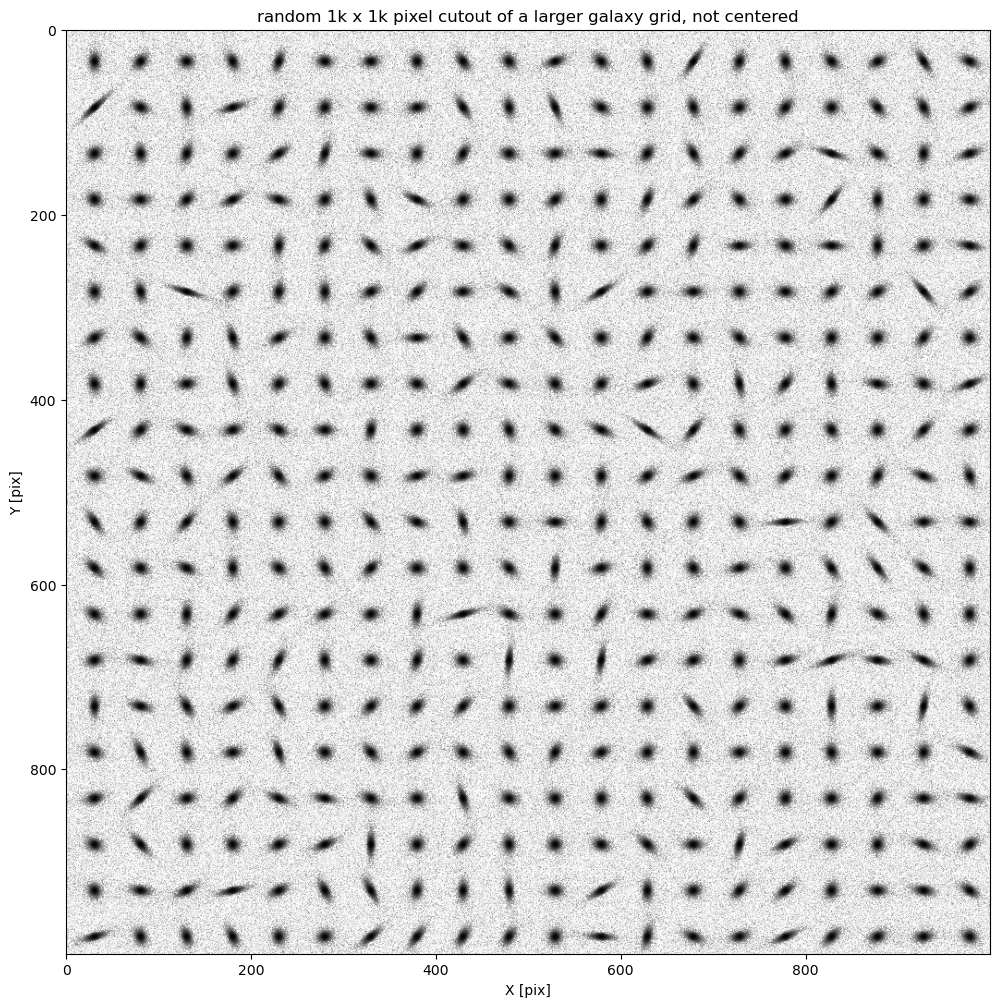

In [25]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)

arr = fr.canvas.array[2000:3000, 3000:4000]
ax.imshow(np.arcsinh(arr) / arr, cmap=plt.cm.gray)
ax.set_xlabel("X [pix]")
ax.set_ylabel("Y [pix]")
ax.set_title('random 1k x 1k pixel cutout of a larger galaxy grid, not centered')
fig.savefig("grid_illustration.png", bbox_inches="tight")

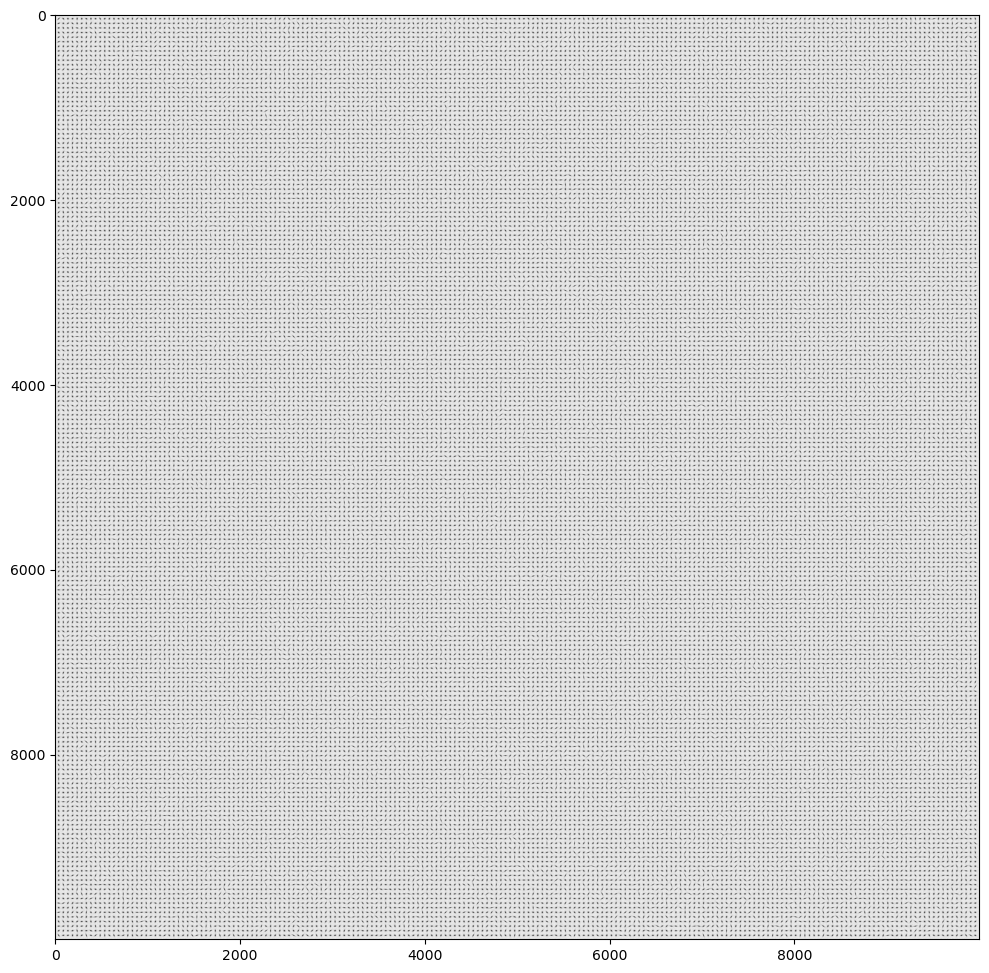

In [26]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)

arr = fr.canvas.array
ax.imshow(np.arcsinh(arr) / arr, cmap=plt.cm.gray)

# MEDS creation

In [27]:
nimage = 1
nobj = len(fr.scat)
obj_data = meds.util.get_meds_input_struct(nobj, extra_fields=[("X_IMAGE", "f8"), ("Y_IMAGE", "f8")])
obj_data['id'] = fr.scat['NUMBER']
obj_data['box_size'] = np.ones(nobj) * 32
obj_data['ra'] = fr.scat['ALPHAWIN_J2000'] + 0.264 / 3600
obj_data['dec'] = fr.scat['DELTAWIN_J2000'] - 0.264 / 3600
obj_data['X_IMAGE'] = fr.scat['X_IMAGE']
obj_data['Y_IMAGE'] = fr.scat['Y_IMAGE']

In [28]:
image_info= meds.util.get_image_info_struct(nimage, 30)

image_info['image_path'][0] = './test_canvas_grid.fits'
image_info['weight_path'][0] = './test_canvas_grid_weight.fits' 
image_info['seg_path'][0] = './test_canvas_grid_seg.fits'
image_info['magzp'] = 30.

config = {'first_image_is_coadd': False,'cutout_types':['weight', 'seg'],'psf_type':'psfex'}

In [29]:
len('./test_canvas_grid_weight.fits' )

30

In [30]:
mpex = frame.MockPSF(fr.df.image_epsf.array)

In [31]:
import psfex

# row=514.25
# col=610.00
pex = psfex.PSFEx("../meds/star_canvas_cat.psf")
# image = pex.get_rec(row, col)
psf_data = [pex,]
# psf_data = [mpex]

In [32]:
mm = meds.MEDSMaker(obj_data=obj_data, image_info=image_info, config=config, psf_data=psf_data)

writing cutouts for: ['image', 'weight', 'seg']


In [33]:
mpex.get_rec(0, 0).shape

(20, 20)

In [34]:
pex.get_rec(0, 0).shape

(23, 23)

In [35]:
pex.get_center(0, 0)

array([11., 11.])

In [36]:
mm.write("testmeds_grid.fits")

file    1 of    1: 'b'./test_canvas_grid.fits''
    first cut:   40000 of  40000 objects
    second cut:  40000 of  40000 objects
40000/40000 had ncut > 0


/home/moon/vargatn/anaconda3/envs/galsim/lib/python3.7/site-packages/meds/util.py:380: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  phat = numpy.array([-1.0*sinp,cosp,0.0]).T


setting start rows and pixel count
total pixels: 40960000
setting psf layout for PSFEx
meds layout build time: 1.857184 seconds
opening output MEDS file: 'testmeds_grid.fits'
writing object_data
writing image_info
writing metadata
    reserving image mosaic
    reserving weight mosaic
    reserving seg mosaic
    reserving psf mosaic
writing image cutouts
    1/1 image b'./test_canvas_grid.fits'
    no background for image
writing weight cutouts
    1/1 weight b'./test_canvas_grid_weight.fits'
writing seg cutouts
    1/1 seg b'./test_canvas_grid_seg.fits'
writing psf cutouts
output is in: testmeds_grid.fits


In [24]:
! ls

config.sex		Pipeline_01.ipynb	   test_canvas_grid_epsf.fits
default.conv		Pipeline_02.ipynb	   test_canvas_grid.fits
default.nnw		Pipeline_03.ipynb	   test_canvas_grid_seg.fits
default.param		Pipeline_04.ipynb	   test_canvas_grid_weight.fits
default.sex		psfex.config		   testmeds_grid.fits
ESRA_Pipeline_01.ipynb	psfex.xml
grid_illustration.png	test_canvas_grid_cat.fits


In [445]:
m = meds.MEDS('testmeds_grid.fits')

In [404]:
cat = m.get_cat()

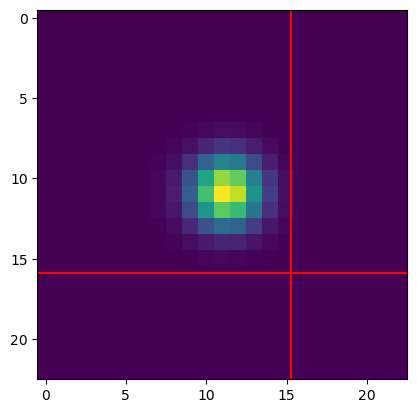

In [442]:
icut = 962
im = m.get_cutout(icut, 0, 'psf')
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(im)
ax.axhline(cat['cutout_row'][icut][0], color="red")
ax.axvline(cat['cutout_col'][icut][0], color="red")


# METACAL

In [410]:
reload(mcal)

<module 'synthetic.render.mcal' from '/home/moon/vargatn/DES/SYNTHETIC/synthetic/synthetic/render/mcal.py'>

In [411]:
def infomaker(maxnum, medsfile, outfile_root, nchunk=100):
    lst = mcal.partition(np.arange(maxnum), n=nchunk)
    
    infodicts = []
    for i, tmp in enumerate(lst):
        info = {
            "medsfile": medsfile,
            "outfile": outfile_root + "_{:03d}.fits".format(i),
            "outdir": None,
            "start": tmp.min(),
            "end": tmp.max() + 1, # due to how lists work, we need to include the one higher value here
        }
        infodicts.append(info)
    return infodicts

In [412]:
infodicts = infomaker(len(fr.scat), medsfile, "metacal_grid")

In [413]:
mcal.multi_mcal(infodicts, nprocess=140)

starting xshear calculations in 100 processes
i=10800: R11: 0.701; R22: 0.904 
i=18800: R11: 0.796; R22: 0.842 
i=33200: R11: 0.702; R22: 0.939 i=6000: R11: 0.799; R22: 0.835 
i=28000: R11: 0.691; R22: 0.931 

i=6800: R11: 1.09; R22: 0.651 i=32800: R11: 0.712; R22: 0.914 i=12000: R11: 0.656; R22: 0.97 i=22800: R11: 0.678; R22: 0.889 i=14400: R11: 0.612; R22: 1.0 i=1200: R11: 0.714; R22: 0.905 

i=3600: R11: 0.674; R22: 0.951 



i=11200: R11: 0.623; R22: 1.05 
i=30000: R11: 0.823; R22: 0.828 

i=29200: R11: 0.708; R22: 0.96 i=5200: R11: 0.755; R22: 0.901 i=4800: R11: 0.598; R22: 1.06 i=3200: R11: 0.801; R22: 0.874 
i=34400: R11: 0.653; R22: 0.974 

i=24800: R11: 0.605; R22: 1.07 

i=34000: R11: 0.884; R22: 0.824 i=31200: R11: 0.663; R22: 0.928 

i=800: R11: 0.679; R22: 0.902 

i=33600: R11: 0.658; R22: 0.963 i=22000: R11: 0.686; R22: 0.945 

i=4400: R11: 0.809; R22: 0.892 i=8000: R11: 0.729; R22: 0.956 

i=4000: R11: 0.951; R22: 0.775 
i=21200: R11: 0.74; R22: 0.863 
i=36400: R11: 0.74

i=37206: R11: 0.814; R22: 0.812 
i=17204: R11: 0.757; R22: 0.857 
i=38405: R11: 0.725; R22: 0.832 
i=20004: R11: 0.698; R22: 0.954 
i=2004: R11: 0.743; R22: 0.856 
i=6005: R11: 0.737; R22: 0.864 
i=13205: R11: 0.698; R22: 0.932 
i=7204: R11: 0.659; R22: 0.959 i=20406: R11: 0.645; R22: 1.02 

i=31206: R11: 1.36; R22: 0.486 i=15204: R11: 0.706; R22: 0.968 

i=8405: R11: 0.662; R22: 0.894 
i=39604: R11: 0.776; R22: 0.785 
i=16405: R11: 0.677; R22: 0.92 
i=11204: R11: 0.916; R22: 0.832 
i=17604: R11: 0.723; R22: 0.935 
i=8005: R11: 0.68; R22: 0.862 
i=5205: R11: 0.674; R22: 0.903 
i=26804: R11: 0.712; R22: 0.922 
i=27205: R11: 0.595; R22: 1.18 
i=12005: R11: 0.744; R22: 0.907 
i=8806: R11: 0.722; R22: 0.973 
i=405: R11: 0.628; R22: 1.12 
i=14004: R11: 0.975; R22: 0.674 
i=34804: R11: 0.712; R22: 0.977 
i=32404: R11: 0.785; R22: 0.923 i=24404: R11: 0.722; R22: 0.856 

i=10805: R11: 0.783; R22: 0.862 
i=5: R11: 0.721; R22: 0.829 
i=14405: R11: 0.663; R22: 0.873 
i=38005: R11: 0.709; R22: 0.9

i=1209: R11: 0.779; R22: 0.829 
i=32809: R11: 0.736; R22: 0.826 i=34808: R11: 0.707; R22: 0.906 

i=14009: R11: 0.723; R22: 0.815 
i=23209: R11: 0.739; R22: 0.821 i=34411: R11: 0.728; R22: 0.916 

i=17209: R11: 0.738; R22: 0.945 i=4809: R11: 1.07; R22: 0.65 

i=33610: R11: 0.805; R22: 0.843 
i=10411: R11: 0.669; R22: 1.09 
i=8010: R11: 0.838; R22: 0.901 
i=24409: R11: 0.702; R22: 0.891 
i=12409: R11: 0.685; R22: 0.953 i=31611: R11: 0.714; R22: 0.886 

i=27609: R11: 0.768; R22: 0.868 
i=19610: R11: 0.798; R22: 0.853 i=32408: R11: 0.73; R22: 0.824 

i=11209: R11: 0.706; R22: 0.918 
i=10: R11: 0.772; R22: 0.867 
i=26008: R11: 0.698; R22: 0.936 
i=14411: R11: 0.71; R22: 0.841 
i=18412: R11: 0.711; R22: 0.82 i=30408: R11: 0.717; R22: 0.87 

i=811: R11: 0.741; R22: 0.798 
i=10811: R11: 0.671; R22: 0.835 
i=14810: R11: 0.823; R22: 0.874 
i=38011: R11: 0.728; R22: 0.91 i=1611: R11: 0.769; R22: 1.01 
i=17609: R11: 0.776; R22: 0.933 

i=20809: R11: 0.791; R22: 0.9 
i=20009: R11: 0.726; R22: 0.83

i=16416: R11: 0.777; R22: 0.794 

i=6818: R11: 0.73; R22: 0.876 
i=4413: R11: 0.767; R22: 0.874 
i=7613: R11: 0.831; R22: 0.872 i=24013: R11: 0.741; R22: 0.926 
i=2015: R11: 0.747; R22: 0.838 i=1214: R11: 0.672; R22: 0.842 i=38816: R11: 0.827; R22: 0.746 




i=35615: R11: 0.788; R22: 0.891 i=30015: R11: 0.723; R22: 0.846 
i=15614: R11: 0.65; R22: 0.952 i=29613: R11: 0.774; R22: 0.883 i=34015: R11: 0.732; R22: 0.821 i=18815: R11: 0.732; R22: 0.868 



i=29213: R11: 0.709; R22: 0.955 i=28413: R11: 0.732; R22: 0.92 


i=8414: R11: 0.696; R22: 0.864 
i=7214: R11: 0.711; R22: 0.865 i=5614: R11: 0.651; R22: 0.912 i=37614: R11: 0.692; R22: 0.846 
i=24815: R11: 0.73; R22: 0.869 


i=38016: R11: 0.987; R22: 0.637 i=25215: R11: 0.748; R22: 0.854 
i=5215: R11: 0.765; R22: 0.81 i=14014: R11: 0.668; R22: 1.03 
i=22415: R11: 0.708; R22: 0.933 
i=22014: R11: 0.697; R22: 0.881 


i=16813: R11: 0.763; R22: 0.886 i=25615: R11: 0.735; R22: 0.803 i=32413: R11: 0.793; R22: 0.903 i=14418: R11: 0.766; R22: 

i=28023: R11: 0.749; R22: 0.828 i=18425: R11: 0.721; R22: 0.811 

i=25220: R11: 0.789; R22: 0.974 
i=14820: R11: 0.727; R22: 0.889 
i=35622: R11: 0.73; R22: 0.806 
i=37221: R11: 0.857; R22: 0.729 i=31222: R11: 0.724; R22: 0.791 

i=34817: R11: 0.748; R22: 0.799 
i=16020: R11: 0.725; R22: 0.838 
i=8020: R11: 0.748; R22: 0.833 
i=23218: R11: 0.751; R22: 0.823 
i=823: R11: 0.704; R22: 0.808 i=6825: R11: 0.762; R22: 0.787 

i=28818: R11: 0.689; R22: 0.857 
i=36019: R11: 0.694; R22: 0.905 
i=12819: R11: 0.688; R22: 0.996 i=22819: R11: 0.696; R22: 0.893 

i=34421: R11: 0.704; R22: 0.87 
i=32021: R11: 0.757; R22: 0.784 
i=19619: R11: 0.759; R22: 0.842 i=23620: R11: 0.715; R22: 0.828 

i=27220: R11: 0.717; R22: 0.853 
i=4420: R11: 0.77; R22: 0.838 
i=420: R11: 0.747; R22: 0.827 
i=33624: R11: 0.765; R22: 0.87 
i=38822: R11: 0.741; R22: 0.803 
i=30022: R11: 0.763; R22: 0.777 
i=20018: R11: 0.761; R22: 0.819 
i=26422: R11: 0.725; R22: 0.836 
i=6023: R11: 0.717; R22: 0.828 
i=2819: R11: 0.698; R2

i=7223: R11: 0.753; R22: 0.837 
i=29222: R11: 0.727; R22: 0.783 


i=14825: R11: 0.73; R22: 0.811 i=22825: R11: 0.741; R22: 0.836 i=20427: R11: 0.743; R22: 0.791 i=10023: R11: 0.745; R22: 0.819 i=38427: R11: 0.731; R22: 0.833 

i=28030: R11: 0.73; R22: 0.759 


i=18022: R11: 0.767; R22: 0.818 
i=33224: R11: 0.702; R22: 0.931 i=20823: R11: 0.695; R22: 0.818 


i=30421: R11: 0.755; R22: 0.799 i=38025: R11: 0.768; R22: 0.739 

i=2825: R11: 0.724; R22: 0.807 
i=34822: R11: 0.723; R22: 0.779 i=4426: R11: 0.841; R22: 0.789 

i=26023: R11: 0.706; R22: 0.838 
i=17622: R11: 0.747; R22: 0.818 
i=19232: R11: 0.749; R22: 0.762 
i=1223: R11: 0.745; R22: 0.882 
i=3224: R11: 0.707; R22: 0.897 i=8423: R11: 0.785; R22: 0.819 

i=30825: R11: 0.723; R22: 0.818 
i=37226: R11: 1.18; R22: 0.582 
i=5226: R11: 0.797; R22: 0.763 
i=25225: R11: 0.71; R22: 0.848 
i=26426: R11: 0.779; R22: 0.794 
i=29623: R11: 0.736; R22: 0.846 
i=2427: R11: 0.693; R22: 0.816 i=12423: R11: 0.757; R22: 0.816 
i=10830: R11: 0.726; 

i=12029: R11: 0.752; R22: 0.897 i=14029: R11: 0.77; R22: 0.839 

i=31231: R11: 0.759; R22: 0.784 i=6837: R11: 0.764; R22: 0.774 

i=35231: R11: 0.791; R22: 0.889 i=4027: R11: 0.726; R22: 0.797 
i=10430: R11: 0.762; R22: 0.785 

i=6034: R11: 0.817; R22: 0.774 i=38832: R11: 1.13; R22: 0.569 

i=16432: R11: 0.749; R22: 0.765 
i=39238: R11: 0.893; R22: 0.742 
i=16031: R11: 0.734; R22: 0.802 i=8032: R11: 0.784; R22: 0.714 

i=10836: R11: 0.772; R22: 0.788 
i=2029: R11: 0.743; R22: 0.807 
i=30034: R11: 0.792; R22: 0.753 
i=30426: R11: 0.829; R22: 0.747 
i=28827: R11: 0.732; R22: 0.8 
i=4432: R11: 0.801; R22: 0.779 
i=27627: R11: 0.771; R22: 0.799 
i=28426: R11: 0.816; R22: 0.742 i=29227: R11: 0.721; R22: 0.773 

i=21226: R11: 0.8; R22: 0.792 
i=14438: R11: 0.867; R22: 0.805 
i=16827: R11: 0.789; R22: 0.764 
i=25230: R11: 0.777; R22: 0.792 i=15627: R11: 0.728; R22: 0.776 

i=3229: R11: 0.732; R22: 0.864 
i=13230: R11: 0.735; R22: 0.764 
i=11235: R11: 0.803; R22: 0.816 
i=26028: R11: 0.762; R2

i=39245: R11: 0.786; R22: 0.752 
i=7232: R11: 0.836; R22: 0.718 i=36033: R11: 0.742; R22: 0.866 

i=16832: R11: 0.816; R22: 0.742 
i=22836: R11: 0.722; R22: 0.785 i=24833: R11: 0.751; R22: 0.81 

i=18834: R11: 0.738; R22: 0.824 
i=17631: R11: 0.788; R22: 0.744 
i=30834: R11: 0.774; R22: 0.792 
i=33233: R11: 0.748; R22: 0.834 
i=27236: R11: 0.771; R22: 0.811 
i=10032: R11: 0.823; R22: 1.0 
i=37632: R11: 0.897; R22: 0.692 
i=15233: R11: 0.735; R22: 0.8 i=7631: R11: 0.744; R22: 0.838 i=5634: R11: 0.675; R22: 0.906 


i=435: R11: 0.796; R22: 0.796 
i=5237: R11: 0.791; R22: 0.734 
i=34034: R11: 0.762; R22: 0.82 
i=33: R11: 0.794; R22: 0.773 
i=8432: R11: 0.775; R22: 0.727 
i=16036: R11: 0.759; R22: 0.768 
i=12034: R11: 0.718; R22: 0.834 
i=4831: R11: 0.777; R22: 0.839 
i=33642: R11: 0.78; R22: 0.828 
i=20832: R11: 0.85; R22: 0.816 
i=10843: R11: 0.841; R22: 0.741 
i=9633: R11: 0.74; R22: 0.828 
i=38838: R11: 0.878; R22: 0.809 
i=17232: R11: 0.81; R22: 0.77 
i=24432: R11: 0.744; R22: 0.786 


i=848: R11: 0.852; R22: 0.749 
i=14038: R11: 0.848; R22: 0.866 
i=26836: R11: 0.76; R22: 0.794 
i=37: R11: 0.799; R22: 0.715 
i=36441: R11: 0.821; R22: 0.759 
i=12439: R11: 0.805; R22: 0.934 
i=39638: R11: 0.813; R22: 0.871 
i=35648: R11: 0.84; R22: 0.736 i=23639: R11: 0.952; R22: 0.715 

i=11637: R11: 0.778; R22: 0.724 
i=10850: R11: 0.785; R22: 0.792 
i=10037: R11: 0.749; R22: 0.744 
i=32048: R11: 0.808; R22: 0.779 
i=15239: R11: 0.839; R22: 0.725 
i=39252: R11: 0.86; R22: 0.644 
i=14839: R11: 0.802; R22: 0.762 
i=31639: R11: 0.83; R22: 0.721 
i=30048: R11: 0.78; R22: 0.782 
i=5242: R11: 0.783; R22: 0.858 
i=6047: R11: 0.764; R22: 0.861 
i=12846: R11: 0.795; R22: 0.725 
i=38441: R11: 0.855; R22: 0.78 
i=29237: R11: 0.858; R22: 0.751 
i=36838: R11: 0.834; R22: 0.803 
i=2442: R11: 0.771; R22: 0.854 
i=19637: R11: 0.773; R22: 0.742 
i=28836: R11: 0.822; R22: 0.756 
i=26441: R11: 0.782; R22: 0.729 
i=33648: R11: 0.854; R22: 0.743 
i=19253: R11: 0.725; R22: 0.759 
i=30839: R11: 0.793; R22

i=7241: R11: 0.802; R22: 0.744 i=19259: R11: 0.766; R22: 0.762 


i=36446: R11: 0.746; R22: 0.77 i=21240: R11: 0.685; R22: 0.818 
i=14844: R11: 0.767; R22: 0.802 i=7640: R11: 0.747; R22: 0.814 
i=9242: R11: 1.15; R22: 0.788 
i=25244: R11: 0.791; R22: 0.747 
i=16446: R11: 0.83; R22: 0.764 i=27246: R11: 0.745; R22: 0.762 i=32841: R11: 0.8; R22: 0.719 
i=3242: R11: 0.732; R22: 0.86 



i=20042: R11: 0.795; R22: 0.827 
i=28056: R11: 0.792; R22: 0.692 

i=42: R11: 0.78; R22: 0.838 i=22041: R11: 0.813; R22: 0.731 i=855: R11: 0.78; R22: 0.771 

i=2447: R11: 0.772; R22: 0.828 
i=3643: R11: 0.835; R22: 0.742 

i=13646: R11: 0.751; R22: 0.754 i=14044: R11: 0.847; R22: 0.715 i=11252: R11: 0.764; R22: 0.71 i=11642: R11: 0.856; R22: 0.842 

i=8843: R11: 0.826; R22: 0.757 
i=38046: R11: 0.847; R22: 0.692 


i=26041: R11: 0.8; R22: 0.8 
i=18458: R11: 0.814; R22: 0.783 
i=31246: R11: 0.738; R22: 0.763 
i=18843: R11: 0.884; R22: 0.764 
i=15641: R11: 0.919; R22: 0.71 i=6444: R11: 0.776; R22: 0.756 

i=2

i=24445: R11: 0.722; R22: 0.798 i=2848: R11: 0.797; R22: 0.771 

i=6060: R11: 0.813; R22: 0.739 

i=6448: R11: 0.819; R22: 0.767 i=24846: R11: 0.731; R22: 0.775 

i=35662: R11: 0.804; R22: 0.766 
i=34845: R11: 0.757; R22: 0.816 
i=30061: R11: 0.781; R22: 0.763 
i=1247: R11: 0.748; R22: 0.844 
i=31251: R11: 0.855; R22: 0.744 
i=20846: R11: 0.767; R22: 0.773 
i=36847: R11: 0.845; R22: 0.796 
i=16846: R11: 0.79; R22: 0.724 
i=32445: R11: 0.763; R22: 0.773 
i=29645: R11: 0.923; R22: 0.833 
i=19266: R11: 0.752; R22: 0.814 
i=2047: R11: 0.766; R22: 0.818 i=37251: R11: 0.9; R22: 0.764 

i=8447: R11: 0.762; R22: 0.826 i=47: R11: 0.768; R22: 0.831 

i=32060: R11: 0.789; R22: 0.759 
i=34450: R11: 0.856; R22: 0.725 
i=2452: R11: 0.854; R22: 0.73 
i=21645: R11: 0.714; R22: 0.773 
i=18465: R11: 0.907; R22: 0.748 
i=28845: R11: 0.749; R22: 0.746 
i=28445: R11: 0.764; R22: 0.745 
i=29246: R11: 0.754; R22: 0.762 
i=3247: R11: 0.778; R22: 0.809 
i=38856: R11: 0.827; R22: 0.661 
i=28062: R11: 0.663; R22

i=12865: R11: 0.835; R22: 0.728 
i=27255: R11: 0.694; R22: 0.87 
i=28849: R11: 0.78; R22: 0.746 
i=3653: R11: 0.784; R22: 0.767 i=33665: R11: 0.803; R22: 0.732 

i=32851: R11: 0.776; R22: 0.734 
i=5654: R11: 0.799; R22: 0.731 
i=14473: R11: 0.806; R22: 0.79 
i=31653: R11: 0.694; R22: 0.772 
i=28449: R11: 0.883; R22: 0.753 
i=26849: R11: 0.77; R22: 0.769 
i=7251: R11: 0.835; R22: 0.714 
i=30069: R11: 0.756; R22: 0.789 
i=17649: R11: 0.753; R22: 0.753 
i=454: R11: 0.803; R22: 0.754 i=20456: R11: 0.552; R22: 1.16 

i=34850: R11: 0.848; R22: 0.704 
i=4465: R11: 0.769; R22: 0.723 
i=5257: R11: 0.752; R22: 0.783 
i=6067: R11: 0.858; R22: 0.722 
i=21249: R11: 0.749; R22: 0.776 
i=35255: R11: 0.789; R22: 0.79 
i=37651: R11: 0.851; R22: 0.731 
i=14053: R11: 0.739; R22: 0.784 
i=20052: R11: 0.849; R22: 0.711 
i=16455: R11: 0.831; R22: 0.756 
i=38863: R11: 0.824; R22: 0.805 i=8452: R11: 0.716; R22: 0.78 

i=13254: R11: 0.799; R22: 0.742 
i=11261: R11: 0.821; R22: 0.766 
i=15652: R11: 0.749; R22: 

i=6457: R11: 0.843; R22: 0.742 i=27260: R11: 0.809; R22: 0.736 

i=32856: R11: 0.841; R22: 0.656 
i=22463: R11: 0.801; R22: 0.782 
i=12460: R11: 0.892; R22: 0.76 
i=1659: R11: 0.738; R22: 0.798 
i=14479: R11: 0.807; R22: 0.739 i=5262: R11: 0.951; R22: 0.704 i=34460: R11: 0.832; R22: 0.696 i=25658: R11: 0.818; R22: 0.752 
i=9656: R11: 0.745; R22: 0.75 i=2461: R11: 0.725; R22: 0.839 
i=24057: R11: 0.772; R22: 0.786 



i=26461: R11: 0.794; R22: 0.763 i=30076: R11: 0.787; R22: 0.703 
i=35677: R11: 0.766; R22: 0.801 


i=30858: R11: 0.782; R22: 0.755 
i=6874: R11: 0.752; R22: 0.729 i=16060: R11: 0.754; R22: 0.774 i=12057: R11: 0.882; R22: 0.745 

i=14058: R11: 0.776; R22: 0.777 
i=18479: R11: 0.739; R22: 0.773 i=38868: R11: 0.859; R22: 0.724 


i=18054: R11: 0.875; R22: 0.725 i=31261: R11: 0.755; R22: 0.788 i=8457: R11: 0.769; R22: 0.793 
i=13660: R11: 0.799; R22: 0.746 
i=34057: R11: 0.803; R22: 0.787 

i=10460: R11: 0.74; R22: 0.783 
i=24855: R11: 0.75; R22: 0.811 

i=2858: R11: 0.796; R

i=31663: R11: 0.792; R22: 0.79 
i=23664: R11: 0.733; R22: 0.781 
i=28083: R11: 0.846; R22: 0.751 
i=10886: R11: 0.711; R22: 0.766 
i=25264: R11: 0.814; R22: 0.739 
i=32081: R11: 0.883; R22: 0.685 
i=26858: R11: 0.842; R22: 0.794 
i=22059: R11: 0.774; R22: 0.764 
i=15263: R11: 0.831; R22: 0.782 
i=27265: R11: 0.805; R22: 0.752 
i=35684: R11: 0.816; R22: 0.712 
i=22867: R11: 0.766; R22: 0.818 
i=21659: R11: 0.763; R22: 0.796 
i=35265: R11: 0.773; R22: 0.746 
i=6880: R11: 0.832; R22: 0.822 
i=1261: R11: 0.764; R22: 0.787 i=16464: R11: 0.733; R22: 0.796 

i=11271: R11: 0.776; R22: 0.746 
i=11663: R11: 0.83; R22: 0.767 
i=38873: R11: 0.9; R22: 0.765 
i=14486: R11: 0.783; R22: 0.739 
i=10062: R11: 0.982; R22: 0.689 i=19285: R11: 0.8; R22: 0.813 
i=25663: R11: 0.949; R22: 0.754 

i=17658: R11: 0.771; R22: 0.761 
i=20465: R11: 1.06; R22: 0.811 i=6080: R11: 0.757; R22: 0.792 

i=34860: R11: 0.764; R22: 0.784 
i=3663: R11: 0.798; R22: 0.803 
i=12465: R11: 0.784; R22: 0.7 
i=18486: R11: 0.746; R2

i=18063: R11: 0.767; R22: 0.789 i=18492: R11: 0.86; R22: 0.742 i=27663: R11: 1.04; R22: 0.806 i=32088: R11: 0.779; R22: 0.732 



i=19292: R11: 0.909; R22: 0.731 
i=30089: R11: 0.768; R22: 0.693 
i=880: R11: 0.809; R22: 0.758 
i=8072: R11: 0.829; R22: 0.724 
i=11275: R11: 0.756; R22: 0.814 
i=37270: R11: 0.866; R22: 0.688 
i=30462: R11: 0.803; R22: 0.768 i=20065: R11: 0.778; R22: 0.733 

i=37664: R11: 0.765; R22: 0.795 
i=17266: R11: 0.749; R22: 0.806 
i=26063: R11: 0.816; R22: 0.782 
i=14868: R11: 0.753; R22: 0.768 
i=12885: R11: 0.82; R22: 0.776 
i=16069: R11: 0.92; R22: 0.753 
i=8868: R11: 0.76; R22: 0.761 i=28462: R11: 0.828; R22: 0.74 i=12066: R11: 0.777; R22: 0.806 


i=15666: R11: 0.763; R22: 0.795 
i=36865: R11: 0.771; R22: 0.751 
i=39666: R11: 0.759; R22: 0.797 i=24864: R11: 0.782; R22: 0.773 

i=3668: R11: 0.73; R22: 0.821 
i=4485: R11: 0.784; R22: 0.807 
i=10470: R11: 0.782; R22: 0.759 
i=24463: R11: 0.827; R22: 0.793 i=31668: R11: 0.733; R22: 0.774 

i=8466: R11: 0.9; R22: 

i=30873: R11: 0.886; R22: 0.749 
i=24467: R11: 0.749; R22: 0.81 i=12071: R11: 0.763; R22: 0.76 i=12475: R11: 0.781; R22: 0.775 



i=886: R11: 0.737; R22: 0.773 

i=8076: R11: 0.775; R22: 0.716 
i=7270: R11: 0.821; R22: 0.753 
i=11672: R11: 0.753; R22: 0.763 
i=16473: R11: 0.822; R22: 0.794 
i=24070: R11: 0.766; R22: 0.757 
i=11279: R11: 0.807; R22: 0.742 
i=71: R11: 0.901; R22: 0.678 
i=39672: R11: 0.814; R22: 0.746 
i=32467: R11: 0.806; R22: 0.786 i=5276: R11: 0.929; R22: 0.669 
i=6893: R11: 0.883; R22: 0.801 i=36069: R11: 0.785; R22: 0.758 
i=22478: R11: 0.837; R22: 0.776 
i=22879: R11: 0.811; R22: 0.706 


i=13275: R11: 0.808; R22: 0.806 
i=28467: R11: 0.778; R22: 0.804 
i=35696: R11: 0.746; R22: 0.701 i=3271: R11: 0.808; R22: 0.726 i=9672: R11: 0.764; R22: 0.753 i=26476: R11: 0.772; R22: 0.714 
i=37669: R11: 0.782; R22: 0.7 


i=20070: R11: 0.829; R22: 0.726 i=13675: R11: 0.777; R22: 0.761 
i=38075: R11: 0.809; R22: 0.75 
i=8471: R11: 0.775; R22: 0.741 i=23270: R11: 0.774; R22: 0.

i=26481: R11: 0.789; R22: 0.76 
i=28102: R11: 0.803; R22: 0.734 
i=17671: R11: 0.797; R22: 0.725 
i=5283: R11: 0.799; R22: 0.754 
i=36874: R11: 0.855; R22: 0.709 
i=4076: R11: 0.784; R22: 0.712 
i=24075: R11: 0.755; R22: 0.788 
i=6476: R11: 0.808; R22: 0.678 
i=21274: R11: 0.745; R22: 0.789 i=14505: R11: 0.761; R22: 0.752 

i=6899: R11: 0.813; R22: 0.714 
i=38482: R11: 0.738; R22: 0.774 
i=19306: R11: 0.771; R22: 0.841 
i=14877: R11: 0.787; R22: 0.772 
i=7675: R11: 0.792; R22: 0.765 
i=10905: R11: 0.788; R22: 0.732 
i=35703: R11: 0.771; R22: 0.74 i=28471: R11: 0.788; R22: 0.742 

i=891: R11: 0.828; R22: 0.744 
i=36074: R11: 0.859; R22: 0.706 
i=31679: R11: 0.751; R22: 0.738 
i=10076: R11: 0.769; R22: 0.711 
i=32100: R11: 0.76; R22: 0.779 
i=13681: R11: 0.803; R22: 0.713 
i=8878: R11: 0.843; R22: 0.725 
i=39679: R11: 0.685; R22: 0.818 
i=24874: R11: 0.739; R22: 0.743 
i=9275: R11: 0.814; R22: 0.723 
i=30878: R11: 0.795; R22: 0.774 
i=12899: R11: 0.735; R22: 0.743 i=9676: R11: 0.759; R22

i=13687: R11: 0.781; R22: 0.791 i=18076: R11: 0.775; R22: 0.714 i=20485: R11: 0.761; R22: 0.831 
i=8087: R11: 0.911; R22: 0.684 i=39685: R11: 0.788; R22: 0.786 
i=481: R11: 0.75; R22: 0.768 


i=9681: R11: 0.745; R22: 0.787 

i=35710: R11: 0.793; R22: 0.787 i=38487: R11: 0.788; R22: 0.76 


i=15680: R11: 0.746; R22: 0.821 
i=4505: R11: 0.829; R22: 0.727 
i=24081: R11: 0.773; R22: 0.754 
i=32106: R11: 0.931; R22: 0.733 
i=2487: R11: 0.895; R22: 0.754 
i=18510: R11: 0.721; R22: 0.809 
i=27285: R11: 0.791; R22: 0.795 
i=28108: R11: 0.844; R22: 0.722 
i=10484: R11: 0.786; R22: 0.763 
i=30477: R11: 0.783; R22: 0.755 
i=2881: R11: 0.526; R22: 1.24 
i=21677: R11: 0.894; R22: 0.73 
i=26876: R11: 0.85; R22: 0.661 i=6105: R11: 0.798; R22: 0.716 

i=34485: R11: 0.848; R22: 0.762 
i=7679: R11: 0.831; R22: 0.736 
i=9280: R11: 0.882; R22: 0.731 
i=38893: R11: 0.759; R22: 0.782 
i=23684: R11: 0.926; R22: 0.676 
i=37678: R11: 0.83; R22: 0.774 
i=28476: R11: 0.766; R22: 0.707 
i=5686: R11: 0.983; R22: 

i=901: R11: 0.771; R22: 0.764 
i=14887: R11: 0.756; R22: 0.803 i=5691: R11: 0.866; R22: 0.739 

i=14088: R11: 0.781; R22: 0.736 
i=39690: R11: 0.847; R22: 0.727 
i=6110: R11: 0.735; R22: 0.789 
i=7283: R11: 0.804; R22: 0.756 
i=12912: R11: 0.801; R22: 0.769 
i=8093: R11: 0.767; R22: 0.807 
i=28114: R11: 0.82; R22: 0.718 
i=26081: R11: 0.813; R22: 0.707 
i=8485: R11: 0.797; R22: 0.785 i=16088: R11: 0.764; R22: 0.732 

i=19318: R11: 0.781; R22: 0.707 i=26491: R11: 0.885; R22: 0.728 

i=1688: R11: 0.761; R22: 0.71 
i=39314: R11: 0.752; R22: 0.851 
i=22894: R11: 0.807; R22: 0.68 
i=15290: R11: 0.762; R22: 0.776 
i=16885: R11: 0.778; R22: 0.808 
i=33284: R11: 0.771; R22: 0.767 i=2886: R11: 0.711; R22: 0.756 

i=8889: R11: 0.762; R22: 0.698 i=14517: R11: 1.07; R22: 0.642 
i=6910: R11: 0.861; R22: 0.735 
i=20085: R11: 0.82; R22: 0.756 

i=4086: R11: 0.756; R22: 0.755 
i=6486: R11: 0.706; R22: 0.764 
i=12491: R11: 1.04; R22: 0.657 
i=32481: R11: 0.745; R22: 0.77 
i=31689: R11: 0.726; R22: 0.70

i=2086: R11: 0.73; R22: 0.769 
i=9290: R11: 0.995; R22: 0.731 
i=16093: R11: 0.774; R22: 0.791 
i=34091: R11: 0.843; R22: 0.7 
i=18523: R11: 0.707; R22: 0.816 i=26496: R11: 0.78; R22: 0.714 

i=15295: R11: 0.905; R22: 0.704 
i=23289: R11: 0.721; R22: 0.714 
i=12919: R11: 0.873; R22: 0.761 
i=24485: R11: 0.8; R22: 0.783 
i=14524: R11: 0.793; R22: 0.763 
i=16492: R11: 0.777; R22: 0.755 
i=7288: R11: 0.845; R22: 0.72 
i=34888: R11: 0.729; R22: 0.741 
i=12498: R11: 0.774; R22: 0.74 
i=39321: R11: 0.88; R22: 0.742 
i=28121: R11: 0.811; R22: 0.763 i=28888: R11: 0.791; R22: 0.721 

i=22085: R11: 0.762; R22: 0.798 
i=27294: R11: 0.841; R22: 0.697 
i=11691: R11: 0.833; R22: 0.73 
i=15689: R11: 0.73; R22: 0.731 
i=17685: R11: 0.769; R22: 0.79 i=32486: R11: 0.81; R22: 0.691 

i=24888: R11: 0.819; R22: 0.73 i=5304: R11: 0.751; R22: 0.832 

i=34494: R11: 0.783; R22: 0.683 
i=6491: R11: 1.14; R22: 0.572 
i=19325: R11: 0.816; R22: 0.734 
i=25292: R11: 0.984; R22: 0.809 
i=90: R11: 0.844; R22: 0.745 


i=20894: R11: 0.816; R22: 0.671 

i=9695: R11: 0.963; R22: 0.677 i=21294: R11: 0.979; R22: 0.589 

i=9295: R11: 0.805; R22: 0.75 
i=5311: R11: 0.798; R22: 0.76 
i=12505: R11: 0.8; R22: 0.734 i=22905: R11: 0.85; R22: 0.713 

i=30494: R11: 0.924; R22: 0.608 
i=19694: R11: 0.848; R22: 0.692 
i=34892: R11: 0.845; R22: 0.671 
i=39704: R11: 0.738; R22: 0.803 
i=37693: R11: 0.737; R22: 0.848 
i=12094: R11: 0.948; R22: 0.626 
i=34499: R11: 0.795; R22: 0.746 
i=31300: R11: 0.776; R22: 0.776 
i=912: R11: 0.774; R22: 0.758 
i=29291: R11: 0.83; R22: 0.778 
i=10096: R11: 0.796; R22: 0.719 
i=4526: R11: 0.844; R22: 0.751 
i=12926: R11: 0.785; R22: 0.803 
i=20498: R11: 0.978; R22: 0.613 
i=30898: R11: 0.727; R22: 0.764 
i=38907: R11: 0.802; R22: 0.713 
i=8495: R11: 0.809; R22: 0.749 
i=10925: R11: 0.841; R22: 0.706 
i=33293: R11: 0.79; R22: 0.786 
i=13705: R11: 0.751; R22: 0.751 
i=14531: R11: 0.794; R22: 0.757 
i=11304: R11: 0.75; R22: 0.82 
i=7293: R11: 0.768; R22: 0.782 
i=6122: R11: 0.916; R22: 0

i=26094: R11: 0.817; R22: 0.715 
i=34504: R11: 0.798; R22: 0.792 
i=500: R11: 1.28; R22: 0.597 
i=27696: R11: 0.762; R22: 0.716 i=24099: R11: 0.749; R22: 0.735 

i=2096: R11: 0.743; R22: 0.749 
i=10504: R11: 0.744; R22: 0.84 i=33716: R11: 0.757; R22: 0.769 

i=9300: R11: 0.8; R22: 0.743 
i=9700: R11: 0.857; R22: 0.685 
i=8109: R11: 0.8; R22: 0.808 
i=7699: R11: 0.716; R22: 0.79 
i=15698: R11: 0.754; R22: 0.756 
i=12932: R11: 0.817; R22: 0.817 
i=14538: R11: 0.784; R22: 0.784 
i=35305: R11: 0.753; R22: 0.711 
i=4101: R11: 0.777; R22: 0.731 
i=26896: R11: 0.932; R22: 0.651 
i=23298: R11: 0.796; R22: 0.71 
i=21696: R11: 0.873; R22: 0.664 i=1297: R11: 0.815; R22: 0.734 i=23704: R11: 0.791; R22: 0.798 


i=13313: R11: 0.838; R22: 0.715 
i=13711: R11: 0.815; R22: 0.725 
i=27304: R11: 0.81; R22: 0.739 i=2901: R11: 0.77; R22: 0.755 

i=19337: R11: 0.751; R22: 0.794 i=5706: R11: 0.776; R22: 0.819 

i=35736: R11: 0.748; R22: 0.803 
i=17299: R11: 0.806; R22: 0.712 
i=3298: R11: 0.792; R22: 0.71 


i=20507: R11: 0.813; R22: 0.717 
i=14107: R11: 0.805; R22: 0.716 
i=5710: R11: 0.724; R22: 0.794 
i=27308: R11: 0.766; R22: 0.742 i=14545: R11: 0.73; R22: 0.833 

i=12939: R11: 0.766; R22: 0.786 
i=34106: R11: 0.874; R22: 0.751 i=24104: R11: 0.796; R22: 0.809 i=25704: R11: 0.79; R22: 0.817 


i=30908: R11: 1.01; R22: 0.642 
i=10509: R11: 0.874; R22: 0.776 
i=21303: R11: 0.886; R22: 0.686 i=3706: R11: 0.779; R22: 0.8 i=37310: R11: 0.776; R22: 0.799 


i=7704: R11: 0.764; R22: 0.824 
i=4900: R11: 0.771; R22: 0.747 
i=1709: R11: 0.808; R22: 0.767 
i=2905: R11: 0.793; R22: 0.762 
i=4106: R11: 0.853; R22: 0.784 
i=23709: R11: 0.794; R22: 0.82 
i=28497: R11: 0.876; R22: 0.722 
i=19344: R11: 0.83; R22: 0.753 
i=23303: R11: 0.732; R22: 0.771 
i=12103: R11: 0.86; R22: 0.692 
i=6136: R11: 0.748; R22: 0.809 
i=3303: R11: 0.719; R22: 0.771 
i=31310: R11: 0.771; R22: 0.754 i=9706: R11: 0.793; R22: 0.835 

i=18543: R11: 0.76; R22: 0.817 
i=11704: R11: 0.897; R22: 0.78 
i=22513: R11: 0.795; R22: 0.71

i=19351: R11: 0.694; R22: 0.834 
i=21307: R11: 0.793; R22: 0.692 
i=39723: R11: 0.596; R22: 1.21 
i=13324: R11: 0.804; R22: 0.72 
i=4110: R11: 0.74; R22: 0.831 
i=4904: R11: 0.799; R22: 0.764 i=21704: R11: 0.752; R22: 0.85 

i=34906: R11: 0.758; R22: 0.842 
i=39346: R11: 0.835; R22: 0.754 
i=5329: R11: 0.798; R22: 0.765 
i=12108: R11: 0.941; R22: 0.687 
i=38922: R11: 0.769; R22: 0.867 
i=7709: R11: 0.975; R22: 0.697 
i=22103: R11: 0.84; R22: 0.754 
i=13724: R11: 0.845; R22: 0.696 
i=10514: R11: 0.827; R22: 0.721 
i=34515: R11: 0.982; R22: 0.679 
i=8118: R11: 0.776; R22: 0.751 
i=4546: R11: 0.819; R22: 0.767 i=25312: R11: 0.876; R22: 0.68 

i=22918: R11: 0.82; R22: 0.705 
i=20512: R11: 0.827; R22: 0.755 
i=28501: R11: 0.758; R22: 0.764 
i=28148: R11: 0.882; R22: 0.683 
i=6143: R11: 0.957; R22: 0.663 
i=14112: R11: 0.791; R22: 0.75 
i=16908: R11: 0.785; R22: 0.741 
i=30137: R11: 1.28; R22: 0.601 
i=23307: R11: 0.832; R22: 0.734 
i=20107: R11: 0.92; R22: 0.668 
i=32905: R11: 0.76; R22: 0.

i=24113: R11: 0.814; R22: 0.713 
i=17708: R11: 0.852; R22: 0.715 
i=37323: R11: 0.749; R22: 0.757 i=18555: R11: 0.793; R22: 0.752 i=35755: R11: 0.813; R22: 0.743 


i=2915: R11: 0.936; R22: 0.683 
i=26908: R11: 0.839; R22: 0.687 
i=4116: R11: 0.767; R22: 0.761 
i=12114: R11: 0.789; R22: 0.762 
i=34521: R11: 0.704; R22: 0.822 
i=22108: R11: 0.77; R22: 0.751 
i=4910: R11: 0.74; R22: 0.786 
i=33731: R11: 0.78; R22: 0.769 
i=16912: R11: 0.716; R22: 0.802 i=11715: R11: 0.81; R22: 0.801 

i=8122: R11: 0.827; R22: 0.698 
i=29310: R11: 0.816; R22: 0.789 
i=30921: R11: 0.745; R22: 0.791 
i=21708: R11: 0.777; R22: 0.731 
i=27710: R11: 0.74; R22: 0.789 
i=32910: R11: 1.03; R22: 0.665 
i=36111: R11: 0.781; R22: 0.76 
i=25715: R11: 0.933; R22: 0.715 
i=7713: R11: 0.935; R22: 0.627 
i=23311: R11: 0.769; R22: 0.745 
i=23719: R11: 0.92; R22: 0.752 
i=17315: R11: 0.841; R22: 0.759 
i=20914: R11: 0.835; R22: 0.723 
i=26110: R11: 0.817; R22: 0.732 
i=20517: R11: 0.784; R22: 0.771 
i=5720: R11: 0.789; R22

i=23315: R11: 0.849; R22: 0.783 
i=32157: R11: 0.767; R22: 0.81 
i=27714: R11: 0.761; R22: 0.76 
i=34917: R11: 0.849; R22: 0.747 
i=10950: R11: 0.725; R22: 0.84 
i=5724: R11: 0.783; R22: 0.777 
i=118: R11: 0.88; R22: 0.661 
i=35761: R11: 0.817; R22: 0.784 
i=16917: R11: 0.83; R22: 0.739 
i=16121: R11: 0.752; R22: 0.79 i=37714: R11: 0.766; R22: 0.766 
i=8520: R11: 0.883; R22: 0.69 i=34122: R11: 0.916; R22: 0.679 i=18561: R11: 0.827; R22: 0.807 
i=4559: R11: 0.803; R22: 0.77 i=32514: R11: 0.784; R22: 0.735 
i=27325: R11: 0.808; R22: 0.789 




i=30926: R11: 0.733; R22: 0.808 
i=20116: R11: 0.759; R22: 0.784 
i=28913: R11: 0.81; R22: 0.741 
i=24513: R11: 0.818; R22: 0.765 
i=16521: R11: 0.799; R22: 0.772 
i=35325: R11: 0.836; R22: 0.764 
i=36116: R11: 0.771; R22: 0.788 
i=3720: R11: 0.833; R22: 0.698 
i=18112: R11: 0.792; R22: 0.765 
i=39358: R11: 0.804; R22: 0.785 
i=17713: R11: 0.903; R22: 0.703 
i=21318: R11: 0.789; R22: 0.734 
i=14121: R11: 0.771; R22: 0.785 i=38525: R11: 0.835; R22: 

i=24922: R11: 0.796; R22: 0.743 
i=3320: R11: 0.824; R22: 0.697 
i=26531: R11: 0.768; R22: 0.773 
i=25724: R11: 0.77; R22: 0.763 
i=29322: R11: 0.838; R22: 0.654 
i=7722: R11: 0.866; R22: 0.651 
i=38130: R11: 0.833; R22: 0.687 
i=4565: R11: 0.696; R22: 0.825 
i=30527: R11: 0.917; R22: 0.663 
i=8525: R11: 0.835; R22: 0.73 
i=32919: R11: 0.852; R22: 0.786 i=5347: R11: 0.734; R22: 0.8 

i=16126: R11: 0.74; R22: 0.807 
i=28515: R11: 0.777; R22: 0.823 i=23320: R11: 0.782; R22: 0.735 i=19723: R11: 0.773; R22: 0.79 


i=26917: R11: 0.757; R22: 0.812 
i=27719: R11: 0.818; R22: 0.803 i=10529: R11: 0.73; R22: 0.771 i=13344: R11: 0.945; R22: 0.667 


i=22531: R11: 0.777; R22: 0.759 
i=20923: R11: 0.779; R22: 0.785 
i=9724: R11: 0.789; R22: 0.795 
i=2536: R11: 0.739; R22: 0.765 
i=8132: R11: 1.07; R22: 0.659 
i=36921: R11: 0.808; R22: 0.764 i=32163: R11: 0.82; R22: 0.78 

i=6951: R11: 0.963; R22: 0.681 
i=37335: R11: 0.832; R22: 0.789 i=18567: R11: 0.972; R22: 0.633 

i=33741: R11: 0.742; R22: 0.7

i=24927: R11: 0.789; R22: 0.719 i=35773: R11: 0.842; R22: 0.749 

i=27335: R11: 0.81; R22: 0.793 
i=20125: R11: 0.794; R22: 0.769 
i=31335: R11: 0.798; R22: 0.836 
i=34927: R11: 0.844; R22: 0.683 
i=17722: R11: 0.783; R22: 0.746 
i=18925: R11: 0.807; R22: 0.768 
i=6166: R11: 0.657; R22: 0.817 
i=29327: R11: 0.803; R22: 0.71 i=2123: R11: 0.732; R22: 0.803 

i=25729: R11: 0.758; R22: 0.778 i=34537: R11: 0.746; R22: 0.786 

i=38941: R11: 0.75; R22: 0.799 i=23733: R11: 0.731; R22: 0.824 

i=3730: R11: 0.81; R22: 0.735 
i=12967: R11: 0.918; R22: 0.689 
i=28520: R11: 0.769; R22: 0.766 
i=17330: R11: 0.791; R22: 0.769 i=14931: R11: 0.829; R22: 0.751 

i=22938: R11: 0.78; R22: 0.78 
i=36126: R11: 0.74; R22: 0.815 
i=14130: R11: 0.808; R22: 0.753 
i=28923: R11: 0.75; R22: 0.793 i=37340: R11: 0.778; R22: 0.753 

i=21328: R11: 0.848; R22: 0.711 
i=27724: R11: 0.81; R22: 0.709 
i=2929: R11: 0.761; R22: 0.765 
i=5353: R11: 0.805; R22: 0.758 
i=1734: R11: 0.849; R22: 0.701 
i=30533: R11: 0.714; R22:

i=28524: R11: 0.833; R22: 0.788 
i=7334: R11: 0.779; R22: 0.746 
i=2934: R11: 0.845; R22: 0.68 
i=28927: R11: 0.812; R22: 0.751 i=1739: R11: 0.798; R22: 0.756 

i=27341: R11: 0.772; R22: 0.784 
i=23737: R11: 0.771; R22: 0.759 
i=32174: R11: 0.751; R22: 0.817 
i=30161: R11: 0.908; R22: 0.791 
i=3734: R11: 0.75; R22: 0.718 
i=20131: R11: 0.941; R22: 0.706 
i=28175: R11: 0.703; R22: 0.948 
i=17727: R11: 0.802; R22: 0.75 i=14134: R11: 0.824; R22: 0.699 i=39375: R11: 0.789; R22: 0.861 
i=2549: R11: 0.759; R22: 0.792 
i=6960: R11: 0.948; R22: 0.7 i=10966: R11: 0.846; R22: 0.73 i=36541: R11: 0.82; R22: 0.734 



i=26129: R11: 0.809; R22: 0.782 
i=25733: R11: 0.733; R22: 0.785 
i=1331: R11: 0.785; R22: 0.759 
i=38945: R11: 0.675; R22: 0.93 

i=38540: R11: 0.733; R22: 0.757 i=23330: R11: 0.838; R22: 0.712 i=22127: R11: 0.81; R22: 0.705 
i=30941: R11: 1.08; R22: 0.674 i=26541: R11: 0.79; R22: 0.782 



i=20536: R11: 0.781; R22: 0.761 
i=29726: R11: 0.895; R22: 0.693 
i=27728: R11: 1.03; R22: 0.6

i=9738: R11: 0.739; R22: 0.789 
i=20936: R11: 0.82; R22: 0.753 
i=136: R11: 0.782; R22: 0.752 
i=39758: R11: 0.911; R22: 0.717 
i=37353: R11: 0.765; R22: 0.769 
i=16539: R11: 0.782; R22: 0.808 
i=14140: R11: 1.06; R22: 0.603 
i=32933: R11: 0.684; R22: 0.837 
i=957: R11: 0.776; R22: 0.812 
i=8942: R11: 0.741; R22: 0.894 
i=16141: R11: 0.921; R22: 0.665 
i=30542: R11: 0.814; R22: 0.728 
i=33334: R11: 0.774; R22: 0.726 
i=15737: R11: 0.921; R22: 0.613 
i=20541: R11: 0.761; R22: 0.769 
i=39381: R11: 0.755; R22: 0.781 
i=35345: R11: 0.752; R22: 0.769 i=6178: R11: 1.04; R22: 0.625 

i=8145: R11: 0.772; R22: 0.8 
i=28932: R11: 0.833; R22: 0.777 
i=13363: R11: 0.833; R22: 0.75 
i=21337: R11: 0.819; R22: 0.773 
i=9344: R11: 0.796; R22: 0.768 
i=14587: R11: 0.677; R22: 0.98 
i=1337: R11: 0.89; R22: 0.755 
i=26546: R11: 0.865; R22: 0.723 
i=3335: R11: 0.768; R22: 0.844 
i=26931: R11: 0.82; R22: 0.729 
i=34547: R11: 0.722; R22: 0.757 i=2939: R11: 0.839; R22: 0.68 

i=33754: R11: 0.822; R22: 0.795 

i=33758: R11: 1.09; R22: 0.56 i=15741: R11: 0.799; R22: 0.756 
i=12142: R11: 0.94; R22: 0.68 


i=38551: R11: 0.78; R22: 0.904 i=14145: R11: 0.739; R22: 0.788 i=6970: R11: 0.764; R22: 0.813 
i=25346: R11: 0.87; R22: 0.716 

i=27350: R11: 0.825; R22: 0.705 
i=29736: R11: 0.793; R22: 0.763 
i=22549: R11: 1.12; R22: 0.617 

i=30950: R11: 0.708; R22: 0.829 i=3743: R11: 0.757; R22: 0.836 i=8544: R11: 0.906; R22: 0.713 

i=33339: R11: 0.794; R22: 0.766 
i=36141: R11: 0.769; R22: 0.772 i=21734: R11: 0.821; R22: 0.73 


i=19744: R11: 0.638; R22: 1.27 i=24941: R11: 0.809; R22: 0.755 
i=6184: R11: 0.668; R22: 0.893 
i=16544: R11: 0.887; R22: 0.728 
i=14593: R11: 0.616; R22: 1.03 i=30171: R11: 0.805; R22: 0.836 
i=11351: R11: 0.735; R22: 0.812 


i=32542: R11: 0.837; R22: 0.748 i=36551: R11: 0.804; R22: 0.781 
i=20941: R11: 1.13; R22: 0.66 
i=5372: R11: 0.783; R22: 0.752 

i=23339: R11: 0.936; R22: 0.662 i=16940: R11: 0.867; R22: 0.688 i=24538: R11: 0.771; R22: 0.777 


i=27737: R11: 0.942; R22: 

i=18140: R11: 0.812; R22: 0.729 i=9353: R11: 0.841; R22: 0.778 

i=14948: R11: 0.793; R22: 0.747 
i=20550: R11: 0.756; R22: 0.767 
i=23752: R11: 0.804; R22: 0.793 i=27741: R11: 0.845; R22: 0.713 

i=12147: R11: 0.773; R22: 0.742 
i=12565: R11: 0.69; R22: 0.803 
i=3747: R11: 0.852; R22: 0.703 
i=12990: R11: 0.772; R22: 0.884 
i=4149: R11: 0.763; R22: 0.837 
i=16944: R11: 0.828; R22: 0.775 i=37747: R11: 0.778; R22: 0.803 

i=2141: R11: 0.771; R22: 0.785 
i=2566: R11: 0.997; R22: 0.623 
i=18596: R11: 0.681; R22: 0.973 
i=28942: R11: 0.972; R22: 0.695 
i=547: R11: 0.733; R22: 0.805 i=29349: R11: 0.759; R22: 0.823 

i=38155: R11: 1.12; R22: 0.608 
i=26941: R11: 0.909; R22: 0.693 
i=19402: R11: 0.67; R22: 0.872 
i=15354: R11: 0.835; R22: 0.782 
i=9748: R11: 0.859; R22: 0.733 
i=34152: R11: 0.846; R22: 0.764 
i=145: R11: 0.758; R22: 0.793 
i=25747: R11: 0.757; R22: 0.771 
i=13375: R11: 0.861; R22: 0.804 
i=21739: R11: 0.786; R22: 0.769 
i=25351: R11: 0.79; R22: 0.746 
i=22957: R11: 0.786; R22

i=14154: R11: 0.734; R22: 0.839 i=19752: R11: 0.889; R22: 0.679 
i=36950: R11: 0.72; R22: 0.789 i=20556: R11: 0.902; R22: 0.746 
i=24547: R11: 0.748; R22: 0.757 

i=30561: R11: 0.794; R22: 0.811 i=18145: R11: 1.13; R22: 0.553 


i=16155: R11: 1.01; R22: 0.635 
i=6979: R11: 0.718; R22: 0.847 
i=38561: R11: 0.527; R22: 1.21 
i=28199: R11: 0.609; R22: 0.987 
i=31755: R11: 0.777; R22: 0.774 i=37752: R11: 0.832; R22: 0.761 i=4600: R11: 0.629; R22: 0.947 i=10559: R11: 0.765; R22: 0.781 i=21744: R11: 0.831; R22: 0.795 




i=5759: R11: 0.859; R22: 0.696 i=16948: R11: 0.757; R22: 0.796 
i=15358: R11: 0.816; R22: 0.705 

i=2573: R11: 0.813; R22: 0.745 i=26149: R11: 0.92; R22: 0.682 

i=17354: R11: 0.748; R22: 0.815 i=22961: R11: 0.872; R22: 0.772 

i=24153: R11: 0.714; R22: 0.846 
i=34950: R11: 0.791; R22: 0.764 i=21351: R11: 1.07; R22: 0.776 i=2146: R11: 0.858; R22: 0.762 
i=4947: R11: 0.753; R22: 0.777 

i=35804: R11: 0.76; R22: 0.839 i=3350: R11: 0.811; R22: 0.741 
i=28543: R11: 0.782; R22: 

i=13782: R11: 0.785; R22: 0.826 i=21355: R11: 1.11; R22: 0.653 

i=38970: R11: 0.68; R22: 0.933 
i=26153: R11: 0.786; R22: 0.805 
i=29359: R11: 0.746; R22: 0.783 
i=32951: R11: 0.749; R22: 0.804 
i=37757: R11: 0.748; R22: 0.858 
i=22565: R11: 1.12; R22: 0.552 
i=10159: R11: 0.724; R22: 0.82 i=25756: R11: 0.751; R22: 0.841 
i=33352: R11: 0.874; R22: 0.749 

i=26950: R11: 0.747; R22: 0.805 
i=3756: R11: 0.745; R22: 0.854 
i=20561: R11: 0.766; R22: 0.857 
i=33772: R11: 0.754; R22: 0.785 
i=35366: R11: 0.862; R22: 0.73 i=20954: R11: 0.816; R22: 0.764 

i=8961: R11: 0.811; R22: 0.833 
i=34955: R11: 0.696; R22: 0.87 
i=28205: R11: 0.708; R22: 0.862 
i=11758: R11: 0.759; R22: 0.794 
i=28548: R11: 0.731; R22: 0.842 
i=36154: R11: 0.697; R22: 0.885 
i=39407: R11: 0.787; R22: 0.75 
i=13003: R11: 0.664; R22: 0.893 
i=38566: R11: 0.685; R22: 0.944 
i=15363: R11: 0.792; R22: 0.835 
i=23353: R11: 0.726; R22: 0.785 
i=4952: R11: 1.0; R22: 0.604 
i=13388: R11: 0.711; R22: 0.907 
i=6203: R11: 0.698; R2

i=25760: R11: 0.766; R22: 0.805 
i=36571: R11: 0.695; R22: 0.94 
i=12582: R11: 0.85; R22: 0.792 
i=16166: R11: 0.705; R22: 0.776 
i=14961: R11: 0.845; R22: 0.787 
i=30970: R11: 0.758; R22: 0.847 
i=20959: R11: 0.725; R22: 0.809 
i=21360: R11: 0.787; R22: 0.779 
i=8169: R11: 0.85; R22: 0.749 
i=32957: R11: 1.19; R22: 0.577 
i=7759: R11: 0.783; R22: 0.754 
i=19419: R11: 0.798; R22: 0.889 
i=27756: R11: 0.914; R22: 0.707 
i=9367: R11: 0.799; R22: 0.788 i=37381: R11: 0.77; R22: 0.787 

i=1362: R11: 0.885; R22: 0.728 i=30189: R11: 0.76; R22: 0.815 

i=17756: R11: 0.813; R22: 0.826 
i=161: R11: 0.799; R22: 0.822 i=3359: R11: 0.836; R22: 0.704 

i=34166: R11: 0.908; R22: 0.72 i=22154: R11: 0.857; R22: 0.753 i=24557: R11: 0.789; R22: 0.79 i=35371: R11: 0.964; R22: 0.652 i=6990: R11: 0.672; R22: 1.02 




i=2584: R11: 0.738; R22: 0.8 
i=34570: R11: 0.838; R22: 0.761 
i=10570: R11: 0.694; R22: 0.908 
i=10165: R11: 0.82; R22: 0.722 
i=6209: R11: 0.714; R22: 0.815 
i=8966: R11: 0.832; R22: 0.727 


i=2587: R11: 0.872; R22: 0.799 
i=18617: R11: 0.749; R22: 0.86 
i=38171: R11: 1.01; R22: 0.732 
i=27758: R11: 0.781; R22: 0.762 
i=22156: R11: 0.777; R22: 0.835 i=26574: R11: 0.726; R22: 0.82 

i=32214: R11: 0.745; R22: 0.893 
i=13011: R11: 0.676; R22: 1.02 
i=16959: R11: 0.756; R22: 0.786 
i=21363: R11: 0.856; R22: 0.734 
i=33359: R11: 0.886; R22: 0.626 i=28556: R11: 0.764; R22: 0.808 

i=3763: R11: 0.773; R22: 0.784 
i=20163: R11: 0.815; R22: 0.787 
i=26957: R11: 0.922; R22: 0.696 
i=32566: R11: 0.836; R22: 0.731 
i=31767: R11: 0.762; R22: 0.758 
i=28215: R11: 0.715; R22: 0.834 
i=11765: R11: 0.652; R22: 0.872 
i=39416: R11: 0.697; R22: 0.898 
i=25763: R11: 1.17; R22: 0.53 
i=19765: R11: 0.802; R22: 0.761 
i=35818: R11: 0.757; R22: 0.78 i=21755: R11: 0.937; R22: 0.717 

i=565: R11: 0.875; R22: 0.749 
i=38574: R11: 0.67; R22: 0.847 
i=15763: R11: 0.804; R22: 0.774 
i=24164: R11: 0.707; R22: 0.817 
i=18157: R11: 0.883; R22: 0.778 
i=20569: R11: 0.86; R22: 0.779 
i=24962: R11: 0.791; R2

i=19769: R11: 0.92; R22: 0.679 i=20965: R11: 0.708; R22: 0.817 

i=1369: R11: 0.908; R22: 0.75 
i=35378: R11: 0.794; R22: 0.794 i=11001: R11: 0.659; R22: 0.941 

i=11377: R11: 0.721; R22: 0.762 
i=15767: R11: 0.726; R22: 0.793 
i=9373: R11: 0.792; R22: 0.782 
i=8570: R11: 0.78; R22: 0.808 
i=8973: R11: 0.763; R22: 0.834 
i=7766: R11: 0.704; R22: 0.742 i=24565: R11: 0.761; R22: 0.726 
i=35824: R11: 0.741; R22: 0.803 
i=32220: R11: 0.732; R22: 0.909 
i=23364: R11: 0.662; R22: 0.825 i=2593: R11: 0.72; R22: 0.929 i=31771: R11: 0.77; R22: 0.848 i=6998: R11: 0.616; R22: 1.12 




i=34968: R11: 0.722; R22: 0.791 
i=16173: R11: 0.778; R22: 0.782 
i=22160: R11: 0.811; R22: 0.77 
i=30579: R11: 0.715; R22: 0.839 
i=17764: R11: 0.958; R22: 0.682 
i=8176: R11: 0.746; R22: 0.861 
i=5774: R11: 0.749; R22: 0.772 
i=168: R11: 0.732; R22: 0.794 
i=32570: R11: 1.16; R22: 0.544 
i=33363: R11: 0.835; R22: 0.744 
i=25768: R11: 0.794; R22: 0.724 
i=13016: R11: 0.629; R22: 0.953 
i=990: R11: 0.828; R22: 0.81 

i=14632: R11: 0.757; R22: 0.772 
i=22580: R11: 0.982; R22: 0.752 i=10177: R11: 0.78; R22: 0.729 

i=35383: R11: 0.731; R22: 0.841 
i=14972: R11: 0.968; R22: 0.615 
i=25772: R11: 0.797; R22: 0.767 
i=31776: R11: 0.771; R22: 0.824 
i=3773: R11: 0.726; R22: 0.865 
i=38583: R11: 0.736; R22: 0.797 
i=38989: R11: 0.638; R22: 0.961 
i=9774: R11: 0.841; R22: 0.727 
i=16178: R11: 0.85; R22: 0.762 
i=19431: R11: 0.785; R22: 0.805 i=7003: R11: 0.74; R22: 0.919 
i=36970: R11: 0.98; R22: 0.677 

i=21765: R11: 0.668; R22: 0.832 
i=30584: R11: 0.732; R22: 0.833 
i=4968: R11: 0.733; R22: 0.774 
i=8575: R11: 0.832; R22: 0.805 
i=8978: R11: 0.897; R22: 0.718 
i=29374: R11: 0.729; R22: 0.803 
i=32225: R11: 0.862; R22: 0.754 
i=21372: R11: 0.767; R22: 0.766 i=24970: R11: 0.72; R22: 0.805 

i=37394: R11: 0.736; R22: 0.82 
i=11774: R11: 1.11; R22: 0.569 
i=11383: R11: 0.675; R22: 0.938 
i=11007: R11: 0.697; R22: 0.916 i=4627: R11: 0.841; R22: 0.786 

i=6578: R11: 0.992; R22: 0.695 
i=37773: R11: 0.684; R22:

i=31387: R11: 0.678; R22: 0.939 
i=38184: R11: 0.653; R22: 0.926 
i=11779: R11: 1.15; R22: 0.553 
i=11387: R11: 0.877; R22: 0.679 
i=6229: R11: 0.746; R22: 0.883 
i=16577: R11: 0.776; R22: 0.735 
i=37778: R11: 0.73; R22: 0.862 
i=39810: R11: 0.687; R22: 0.833 i=17774: R11: 0.83; R22: 0.718 
i=1787: R11: 1.07; R22: 0.658 i=34978: R11: 0.758; R22: 0.832 
i=26589: R11: 0.461; R22: 1.26 


i=34588: R11: 0.887; R22: 0.776 i=29770: R11: 0.782; R22: 0.826 
i=10588: R11: 0.742; R22: 0.855 
i=28232: R11: 0.848; R22: 0.84 i=22171: R11: 0.789; R22: 0.805 


i=8983: R11: 1.04; R22: 0.634 
i=578: R11: 0.732; R22: 0.822 
i=38994: R11: 0.765; R22: 0.813 
i=33373: R11: 1.02; R22: 0.616 
i=22989: R11: 0.79; R22: 0.804 
i=20582: R11: 0.748; R22: 0.87 
i=10182: R11: 0.792; R22: 0.833 
i=15384: R11: 0.719; R22: 0.862 
i=14638: R11: 0.771; R22: 0.821 
i=13027: R11: 0.756; R22: 0.849 
i=30206: R11: 0.704; R22: 0.981 
i=7008: R11: 0.69; R22: 0.857 
i=30590: R11: 0.761; R22: 0.936 
i=1381: R11: 0.853; R22: 0.

i=26594: R11: 1.03; R22: 0.655 
i=36180: R11: 0.931; R22: 0.756 
i=7780: R11: 0.885; R22: 0.85 i=16978: R11: 0.78; R22: 0.761 

i=13421: R11: 0.761; R22: 0.824 
i=1387: R11: 0.749; R22: 0.828 
i=30992: R11: 0.698; R22: 0.87 i=2175: R11: 0.769; R22: 0.851 

i=17385: R11: 0.808; R22: 0.769 
i=21775: R11: 0.776; R22: 0.852 
i=18978: R11: 0.712; R22: 0.881 
i=5423: R11: 0.783; R22: 0.831 
i=32236: R11: 0.805; R22: 0.734 
i=28239: R11: 0.703; R22: 0.752 
i=16582: R11: 0.743; R22: 0.888 
i=37403: R11: 0.714; R22: 0.766 i=38593: R11: 0.74; R22: 0.863 

i=1004: R11: 0.746; R22: 0.833 i=29384: R11: 0.664; R22: 0.884 
i=25387: R11: 0.687; R22: 0.954 

i=10187: R11: 0.8; R22: 0.824 i=18175: R11: 0.942; R22: 0.754 

i=39440: R11: 0.801; R22: 0.787 
i=12607: R11: 0.729; R22: 0.886 
i=34188: R11: 0.692; R22: 0.844 
i=20587: R11: 0.692; R22: 0.906 
i=31787: R11: 0.651; R22: 0.948 i=26974: R11: 1.02; R22: 0.599 

i=8585: R11: 0.723; R22: 0.883 
i=183: R11: 0.737; R22: 0.867 i=37783: R11: 0.775; R22: 0

i=23381: R11: 0.799; R22: 0.793 i=7016: R11: 0.702; R22: 0.882 

i=11788: R11: 0.639; R22: 1.02 
i=39443: R11: 0.764; R22: 0.85 
i=39820: R11: 0.708; R22: 0.863 i=32590: R11: 0.948; R22: 0.717 

i=2177: R11: 0.856; R22: 0.712 
i=16584: R11: 0.732; R22: 0.813 
i=37785: R11: 0.698; R22: 0.893 
i=16981: R11: 0.704; R22: 0.849 
i=1794: R11: 0.595; R22: 1.09 
i=30599: R11: 0.606; R22: 1.04 
i=29386: R11: 0.843; R22: 0.759 
i=13423: R11: 0.675; R22: 1.08 
i=11018: R11: 0.659; R22: 1.12 i=26976: R11: 0.758; R22: 0.795 

i=17388: R11: 0.644; R22: 0.873 
i=32982: R11: 0.911; R22: 0.764 
i=27392: R11: 0.804; R22: 0.771 
i=5426: R11: 0.754; R22: 0.808 
i=12186: R11: 0.721; R22: 0.905 
i=11394: R11: 0.541; R22: 1.16 
i=10595: R11: 0.617; R22: 1.11 
i=22178: R11: 1.05; R22: 0.633 i=3786: R11: 0.753; R22: 0.862 

i=7389: R11: 0.785; R22: 0.785 
i=16190: R11: 0.74; R22: 0.922 
i=18177: R11: 0.719; R22: 0.829 
i=36183: R11: 0.658; R22: 0.959 
i=18643: R11: 0.744; R22: 0.808 
i=36982: R11: 0.723; R22: 

i=18181: R11: 0.671; R22: 0.903 i=24587: R11: 0.652; R22: 0.955 i=39449: R11: 0.678; R22: 0.827 

i=35402: R11: 0.681; R22: 0.92 

i=36187: R11: 0.698; R22: 0.92 
i=24987: R11: 0.717; R22: 0.957 i=37791: R11: 0.716; R22: 0.855 i=26187: R11: 0.767; R22: 0.826 i=15787: R11: 0.901; R22: 0.779 



i=33385: R11: 0.85; R22: 0.798 i=16589: R11: 0.737; R22: 0.848 i=34599: R11: 0.595; R22: 1.05 i=36986: R11: 0.823; R22: 0.74 

i=23796: R11: 0.67; R22: 1.02 
i=21784: R11: 0.818; R22: 0.75 

i=13821: R11: 0.741; R22: 0.861 

i=20987: R11: 0.836; R22: 0.831 i=1011: R11: 0.756; R22: 0.88 
i=21389: R11: 0.402; R22: 1.34 

i=4648: R11: 0.842; R22: 0.77 i=2616: R11: 0.648; R22: 0.927 i=20191: R11: 0.807; R22: 0.86 

i=16986: R11: 0.645; R22: 0.927 i=22183: R11: 0.734; R22: 0.908 
i=12615: R11: 0.715; R22: 0.911 i=39006: R11: 0.83; R22: 0.705 i=31399: R11: 0.606; R22: 1.02 i=18985: R11: 1.25; R22: 0.504 


i=13429: R11: 0.795; R22: 0.941 


i=27784: R11: 0.697; R22: 0.859 

i=6594: R11: 0.862; R22: 0.8

i=5438: R11: 0.871; R22: 0.802 
i=18655: R11: 0.806; R22: 0.786 
i=20992: R11: 0.718; R22: 0.861 
i=32991: R11: 0.641; R22: 0.974 
i=7399: R11: 0.686; R22: 0.864 
i=5798: R11: 0.61; R22: 1.13 
i=195: R11: 0.805; R22: 0.803 
i=14196: R11: 0.642; R22: 1.07 
i=14660: R11: 0.819; R22: 0.725 i=2994: R11: 0.528; R22: 1.13 

i=29787: R11: 0.9; R22: 0.648 
i=11799: R11: 0.647; R22: 0.984 
i=19797: R11: 0.73; R22: 0.962 
i=10605: R11: 0.718; R22: 0.926 
i=28252: R11: 0.905; R22: 0.767 
i=37796: R11: 1.01; R22: 0.711 
i=13050: R11: 0.75; R22: 0.795 
i=24196: R11: 0.757; R22: 0.972 i=16991: R11: 0.723; R22: 0.882 

i=6251: R11: 0.802; R22: 0.729 
i=15400: R11: 0.651; R22: 0.933 
i=34994: R11: 0.785; R22: 0.88 
i=18186: R11: 0.722; R22: 0.849 
i=23391: R11: 0.752; R22: 0.856 
i=25400: R11: 0.626; R22: 0.957 
i=26986: R11: 0.874; R22: 0.738 
i=34200: R11: 0.626; R22: 0.942 
i=21790: R11: 0.876; R22: 0.811 
i=39833: R11: 0.735; R22: 0.783 
i=17398: R11: 0.652; R22: 1.02 
i=11028: R11: 0.74; R22: 0.8

i=26613: R11: 0.697; R22: 0.871 
i=33816: R11: 0.72; R22: 0.899 
i=14667: R11: 0.857; R22: 0.734 
i=16203: R11: 0.714; R22: 0.8 
i=4659: R11: 0.79; R22: 0.778 
i=13440: R11: 0.749; R22: 0.807 
i=3801: R11: 0.724; R22: 0.917 
i=16995: R11: 0.97; R22: 0.704 i=11034: R11: 0.746; R22: 0.849 i=28595: R11: 0.881; R22: 0.741 i=10203: R11: 0.68; R22: 0.94 



i=19803: R11: 0.731; R22: 0.903 
i=14201: R11: 0.588; R22: 1.07 i=36613: R11: 0.711; R22: 0.814 

i=20603: R11: 0.733; R22: 0.872 
i=23805: R11: 0.678; R22: 0.898 i=21795: R11: 0.732; R22: 0.894 

i=9007: R11: 0.688; R22: 0.975 
i=598: R11: 0.676; R22: 1.02 
i=8207: R11: 0.718; R22: 0.863 
i=11408: R11: 0.737; R22: 0.821 
i=1021: R11: 0.75; R22: 0.872 
i=35412: R11: 0.75; R22: 0.854 i=38206: R11: 0.803; R22: 0.768 

i=3398: R11: 0.786; R22: 0.949 
i=8602: R11: 0.769; R22: 0.804 
i=11804: R11: 0.788; R22: 0.902 i=5445: R11: 0.712; R22: 0.812 

i=24201: R11: 0.656; R22: 1.03 
i=7797: R11: 0.698; R22: 0.963 
i=22606: R11: 0.777; R22: 0.901 i

i=28998: R11: 1.14; R22: 0.661 
i=21001: R11: 0.657; R22: 1.0 i=31809: R11: 0.731; R22: 0.862 

i=3004: R11: 0.693; R22: 0.975 
i=10614: R11: 0.692; R22: 0.898 
i=28263: R11: 0.725; R22: 0.856 
i=32263: R11: 0.749; R22: 0.813 
i=23016: R11: 0.629; R22: 1.02 i=17408: R11: 0.642; R22: 0.917 

i=13061: R11: 0.789; R22: 0.766 
i=8606: R11: 0.765; R22: 0.854 
i=36202: R11: 0.686; R22: 0.858 i=27798: R11: 1.12; R22: 0.693 

i=22197: R11: 0.532; R22: 1.16 
i=39845: R11: 0.712; R22: 0.841 
i=20608: R11: 0.689; R22: 0.874 
i=5000: R11: 0.657; R22: 0.884 
i=21800: R11: 0.606; R22: 0.997 
i=6262: R11: 0.793; R22: 0.76 
i=25409: R11: 0.768; R22: 0.757 i=4207: R11: 0.719; R22: 0.897 

i=11809: R11: 0.736; R22: 0.817 
i=13445: R11: 0.803; R22: 0.741 
i=205: R11: 0.704; R22: 0.846 
i=26619: R11: 0.685; R22: 0.906 
i=39019: R11: 0.778; R22: 0.792 
i=33001: R11: 0.72; R22: 0.874 
i=16209: R11: 0.748; R22: 0.884 
i=4665: R11: 0.81; R22: 0.774 
i=35417: R11: 0.716; R22: 0.924 
i=33821: R11: 0.615; R22: 1

i=27416: R11: 0.661; R22: 0.968 
i=19472: R11: 0.812; R22: 0.792 
i=3811: R11: 0.729; R22: 0.913 
i=8218: R11: 0.787; R22: 0.788 
i=5812: R11: 0.765; R22: 0.824 i=11814: R11: 0.748; R22: 0.839 

i=15414: R11: 0.723; R22: 0.857 
i=33006: R11: 0.788; R22: 0.993 
i=32617: R11: 0.733; R22: 0.896 
i=210: R11: 0.684; R22: 0.992 
i=33403: R11: 0.707; R22: 0.808 
i=6268: R11: 0.81; R22: 0.795 
i=13842: R11: 0.757; R22: 0.796 
i=10213: R11: 0.734; R22: 0.836 
i=28268: R11: 0.793; R22: 0.802 
i=7041: R11: 0.919; R22: 0.808 
i=38619: R11: 0.815; R22: 0.763 
i=35422: R11: 0.742; R22: 0.922 
i=4670: R11: 0.787; R22: 0.725 
i=35873: R11: 0.73; R22: 0.79 
i=5005: R11: 0.714; R22: 0.836 i=1032: R11: 0.746; R22: 0.759 

i=27803: R11: 0.717; R22: 0.834 
i=14679: R11: 0.937; R22: 0.696 
i=21006: R11: 0.748; R22: 0.905 
i=4212: R11: 0.779; R22: 0.826 
i=26206: R11: 0.708; R22: 0.929 
i=7414: R11: 0.763; R22: 0.929 
i=13068: R11: 0.777; R22: 0.785 
i=29410: R11: 0.607; R22: 1.07 i=18202: R11: 0.699; R22: 0

i=17008: R11: 0.664; R22: 0.924 
i=28274: R11: 0.827; R22: 0.749 
i=39857: R11: 0.743; R22: 0.773 i=4677: R11: 0.721; R22: 0.79 

i=4216: R11: 0.683; R22: 0.862 
i=29414: R11: 0.741; R22: 0.845 
i=34622: R11: 0.764; R22: 0.879 
i=31023: R11: 0.833; R22: 0.851 
i=5461: R11: 0.899; R22: 0.866 i=2642: R11: 0.764; R22: 0.783 

i=33408: R11: 0.766; R22: 0.866 
i=19479: R11: 0.821; R22: 0.727 
i=7047: R11: 0.675; R22: 0.887 
i=34220: R11: 0.787; R22: 0.802 
i=16220: R11: 0.774; R22: 0.835 
i=15012: R11: 0.769; R22: 0.798 
i=26210: R11: 0.653; R22: 0.873 i=5010: R11: 0.774; R22: 0.845 i=12641: R11: 0.829; R22: 0.872 


i=18206: R11: 0.714; R22: 0.95 
i=17417: R11: 0.759; R22: 0.849 
i=25014: R11: 0.749; R22: 0.84 
i=39479: R11: 0.861; R22: 0.714 
i=7813: R11: 0.744; R22: 0.842 
i=16613: R11: 0.706; R22: 0.872 i=20617: R11: 0.725; R22: 0.849 

i=32623: R11: 0.759; R22: 0.861 i=3414: R11: 0.728; R22: 0.85 

i=39028: R11: 0.776; R22: 0.808 
i=21414: R11: 0.709; R22: 0.897 
i=13075: R11: 0.806; R

i=22625: R11: 0.654; R22: 0.986 i=14691: R11: 0.765; R22: 0.814 

i=28279: R11: 0.738; R22: 0.841 
i=38631: R11: 0.887; R22: 0.704 
i=12647: R11: 0.714; R22: 0.869 
i=13081: R11: 0.886; R22: 0.771 
i=617: R11: 0.745; R22: 0.88 
i=18685: R11: 0.764; R22: 0.751 
i=4221: R11: 0.762; R22: 0.809 
i=31028: R11: 0.732; R22: 0.852 
i=9424: R11: 0.722; R22: 0.865 i=19486: R11: 0.775; R22: 0.765 i=32628: R11: 0.761; R22: 0.814 i=10628: R11: 0.79; R22: 0.88 

i=7052: R11: 0.849; R22: 0.774 

i=34627: R11: 0.8; R22: 0.844 i=8227: R11: 0.75; R22: 0.833 


i=37442: R11: 0.766; R22: 0.83 
i=27427: R11: 0.803; R22: 0.776 
i=11053: R11: 0.825; R22: 0.789 
i=13853: R11: 0.77; R22: 0.848 
i=21015: R11: 0.722; R22: 0.824 
i=25019: R11: 0.681; R22: 0.919 
i=15814: R11: 0.674; R22: 0.902 
i=219: R11: 0.721; R22: 0.885 
i=11824: R11: 1.25; R22: 0.473 
i=9027: R11: 0.843; R22: 0.833 
i=10223: R11: 0.809; R22: 0.799 i=25426: R11: 0.82; R22: 0.825 

i=23826: R11: 0.615; R22: 0.99 
i=6627: R11: 0.776; R22: 0.843

i=28285: R11: 0.981; R22: 0.693 
i=2652: R11: 0.82; R22: 0.823 
i=29018: R11: 0.739; R22: 0.807 
i=39870: R11: 0.783; R22: 0.751 
i=13088: R11: 0.746; R22: 0.819 
i=29423: R11: 0.872; R22: 0.911 
i=27817: R11: 0.761; R22: 0.847 
i=15427: R11: 0.776; R22: 0.841 
i=21020: R11: 0.779; R22: 0.787 i=36221: R11: 0.802; R22: 0.757 

i=27016: R11: 0.675; R22: 0.861 
i=34229: R11: 0.832; R22: 0.834 i=13858: R11: 0.819; R22: 0.748 

i=2219: R11: 0.77; R22: 0.865 
i=11058: R11: 0.778; R22: 0.761 i=13470: R11: 0.908; R22: 0.691 

i=3826: R11: 0.766; R22: 0.807 
i=35890: R11: 0.742; R22: 0.804 
i=18215: R11: 0.698; R22: 0.846 
i=37021: R11: 0.794; R22: 0.757 
i=6286: R11: 0.768; R22: 0.774 
i=25822: R11: 0.781; R22: 0.829 
i=19492: R11: 0.772; R22: 0.714 
i=8624: R11: 0.776; R22: 0.779 
i=38231: R11: 0.841; R22: 0.712 
i=32287: R11: 0.831; R22: 0.762 
i=224: R11: 0.708; R22: 0.83 
i=23422: R11: 0.733; R22: 0.894 
i=33418: R11: 0.78; R22: 0.797 
i=10634: R11: 0.768; R22: 0.841 
i=35437: R11: 0.72; R

i=6291: R11: 0.772; R22: 0.796 
i=12657: R11: 0.789; R22: 0.776 
i=27021: R11: 0.752; R22: 0.849 
i=20632: R11: 0.73; R22: 0.913 
i=11063: R11: 0.745; R22: 0.815 i=21825: R11: 0.731; R22: 0.808 

i=19832: R11: 0.722; R22: 0.842 
i=1053: R11: 0.714; R22: 0.955 
i=19022: R11: 0.774; R22: 0.849 i=36641: R11: 0.937; R22: 0.786 
i=6636: R11: 0.77; R22: 0.736 
i=23427: R11: 0.74; R22: 0.994 
i=35442: R11: 0.765; R22: 0.832 

i=23836: R11: 0.817; R22: 0.754 
i=2657: R11: 0.932; R22: 0.744 
i=11434: R11: 0.826; R22: 0.873 
i=25827: R11: 0.806; R22: 0.771 
i=29820: R11: 0.756; R22: 0.853 
i=37026: R11: 1.17; R22: 0.507 
i=5024: R11: 0.714; R22: 0.821 
i=38642: R11: 0.76; R22: 0.767 
i=23041: R11: 0.855; R22: 0.769 
i=15823: R11: 0.814; R22: 0.831 
i=38237: R11: 0.77; R22: 0.792 
i=14703: R11: 0.764; R22: 0.786 
i=13477: R11: 0.833; R22: 0.725 
i=5481: R11: 0.791; R22: 0.728 
i=12228: R11: 0.759; R22: 0.859 
i=3429: R11: 0.856; R22: 0.802 
i=13095: R11: 0.798; R22: 0.749 
i=9038: R11: 0.818; R22

i=26648: R11: 0.772; R22: 0.81 
i=10644: R11: 0.743; R22: 0.819 
i=37834: R11: 0.744; R22: 0.87 
i=12663: R11: 0.731; R22: 0.852 
i=19505: R11: 0.788; R22: 0.775 
i=1444: R11: 0.836; R22: 0.779 
i=23433: R11: 0.716; R22: 0.798 
i=1058: R11: 0.855; R22: 0.708 
i=17436: R11: 0.758; R22: 0.774 
i=28630: R11: 0.748; R22: 0.777 
i=10238: R11: 0.755; R22: 0.831 
i=13482: R11: 0.841; R22: 0.697 
i=21433: R11: 0.722; R22: 0.804 
i=8635: R11: 0.712; R22: 0.841 
i=29824: R11: 0.718; R22: 0.79 
i=32297: R11: 0.866; R22: 0.716 
i=7436: R11: 0.793; R22: 0.743 
i=24234: R11: 0.773; R22: 0.81 
i=31042: R11: 0.731; R22: 0.775 
i=4702: R11: 0.788; R22: 0.746 
i=236: R11: 0.757; R22: 0.755 i=29432: R11: 0.771; R22: 0.827 

i=33428: R11: 0.808; R22: 0.837 
i=19027: R11: 0.803; R22: 0.827 
i=35029: R11: 0.787; R22: 0.804 
i=5835: R11: 0.757; R22: 0.778 i=26229: R11: 0.837; R22: 0.798 

i=23841: R11: 0.834; R22: 0.801 
i=21030: R11: 0.776; R22: 0.758 
i=39048: R11: 0.79; R22: 0.859 
i=30264: R11: 0.848; R2

i=31845: R11: 0.703; R22: 0.818 i=11843: R11: 0.803; R22: 0.786 

i=37462: R11: 1.05; R22: 0.649 
i=20239: R11: 0.703; R22: 0.761 
i=14714: R11: 0.752; R22: 0.716 
i=10649: R11: 0.742; R22: 0.799 
i=3840: R11: 0.776; R22: 0.759 i=23050: R11: 0.782; R22: 0.734 i=32303: R11: 0.798; R22: 0.753 


i=29829: R11: 0.765; R22: 0.807 i=14238: R11: 0.77; R22: 0.828 
i=29033: R11: 0.746; R22: 0.851 i=4240: R11: 0.598; R22: 1.15 


i=36651: R11: 0.796; R22: 0.724 
i=32648: R11: 0.798; R22: 0.779 
i=37036: R11: 0.765; R22: 0.713 
i=19032: R11: 0.775; R22: 0.858 
i=15034: R11: 0.735; R22: 0.878 i=24239: R11: 0.707; R22: 0.793 

i=6304: R11: 0.782; R22: 0.768 i=13106: R11: 0.774; R22: 0.75 

i=11072: R11: 0.73; R22: 0.764 
i=26653: R11: 0.883; R22: 0.784 
i=34647: R11: 0.717; R22: 0.819 
i=637: R11: 0.765; R22: 0.767 
i=8247: R11: 0.675; R22: 0.842 
i=39890: R11: 0.767; R22: 0.763 
i=19512: R11: 0.756; R22: 0.757 
i=31047: R11: 0.7; R22: 0.86 i=26234: R11: 0.753; R22: 0.841 

i=16634: R11: 0.757; R22

i=29833: R11: 0.852; R22: 0.776 i=22647: R11: 0.698; R22: 0.84 

i=2237: R11: 0.779; R22: 0.754 
i=37467: R11: 0.888; R22: 0.664 
i=19518: R11: 0.793; R22: 0.822 
i=37843: R11: 0.771; R22: 0.755 
i=13881: R11: 0.733; R22: 0.752 
i=5040: R11: 0.86; R22: 0.788 
i=21843: R11: 0.743; R22: 0.803 i=31850: R11: 0.758; R22: 0.832 

i=30273: R11: 0.713; R22: 0.794 
i=1068: R11: 0.803; R22: 0.792 
i=13112: R11: 0.89; R22: 0.634 
i=35913: R11: 0.778; R22: 0.823 
i=27036: R11: 0.86; R22: 0.756 
i=17840: R11: 0.725; R22: 0.829 
i=2672: R11: 0.727; R22: 0.774 
i=21040: R11: 0.737; R22: 0.811 i=33859: R11: 0.86; R22: 0.769 

i=23443: R11: 0.76; R22: 0.819 
i=20648: R11: 0.779; R22: 0.781 
i=20244: R11: 0.765; R22: 0.782 
i=17036: R11: 0.73; R22: 0.764 
i=39517: R11: 0.844; R22: 0.695 
i=10654: R11: 0.832; R22: 0.796 
i=28311: R11: 0.769; R22: 0.722 
i=1457: R11: 0.819; R22: 0.721 
i=29441: R11: 0.78; R22: 0.833 
i=34652: R11: 0.823; R22: 0.816 
i=1852: R11: 0.829; R22: 0.786 
i=7077: R11: 0.855; R22:

i=29838: R11: 0.761; R22: 0.888 i=23059: R11: 0.89; R22: 0.7 


i=15452: R11: 0.781; R22: 0.847 
i=11454: R11: 0.829; R22: 0.751 i=36243: R11: 0.876; R22: 0.927 



i=25847: R11: 0.847; R22: 0.912 
i=20248: R11: 0.784; R22: 0.78 i=11081: R11: 0.813; R22: 0.779 

i=16643: R11: 0.755; R22: 0.793 
i=15044: R11: 0.733; R22: 0.83 i=23447: R11: 0.721; R22: 0.842 

i=33864: R11: 0.841; R22: 0.747 
i=3448: R11: 0.823; R22: 0.788 i=5044: R11: 0.777; R22: 0.797 

i=31058: R11: 0.789; R22: 0.743 
i=17844: R11: 0.724; R22: 0.818 
i=17450: R11: 0.641; R22: 1.03 
i=4720: R11: 0.877; R22: 0.702 
i=13500: R11: 0.892; R22: 0.693 
i=38256: R11: 0.757; R22: 0.766 
i=28645: R11: 0.745; R22: 0.775 
i=27041: R11: 0.796; R22: 0.824 
i=34253: R11: 0.787; R22: 0.817 
i=13888: R11: 0.746; R22: 0.792 
i=34656: R11: 0.806; R22: 0.714 
i=19041: R11: 0.686; R22: 0.913 
i=27457: R11: 0.765; R22: 0.814 i=14726: R11: 0.775; R22: 0.815 
i=25455: R11: 0.905; R22: 0.744 i=251: R11: 0.76; R22: 0.753 
i=5848: R11: 0.826; R

i=35927: R11: 0.8; R22: 0.747 
i=11086: R11: 0.795; R22: 0.757 
i=38667: R11: 0.732; R22: 0.753 
i=16259: R11: 0.867; R22: 0.759 
i=7086: R11: 0.782; R22: 0.764 
i=31464: R11: 0.878; R22: 0.753 
i=11459: R11: 0.792; R22: 0.783 
i=5853: R11: 0.852; R22: 0.819 
i=25852: R11: 0.85; R22: 0.823 
i=30673: R11: 0.735; R22: 0.772 
i=256: R11: 0.901; R22: 0.781 i=33045: R11: 0.713; R22: 0.821 

i=32662: R11: 0.739; R22: 0.779 
i=28323: R11: 0.873; R22: 0.752 
i=3854: R11: 0.859; R22: 0.828 
i=13125: R11: 0.934; R22: 0.705 i=9460: R11: 0.813; R22: 0.749 

i=27047: R11: 0.728; R22: 0.868 
i=7456: R11: 0.773; R22: 0.758 
i=20658: R11: 0.784; R22: 0.768 
i=4254: R11: 0.814; R22: 0.78 
i=19857: R11: 0.834; R22: 0.726 
i=26667: R11: 0.683; R22: 0.764 
i=32320: R11: 0.859; R22: 0.713 
i=18245: R11: 0.717; R22: 0.818 
i=23064: R11: 0.836; R22: 0.779 i=23860: R11: 0.804; R22: 0.757 

i=10664: R11: 0.832; R22: 0.78 
i=651: R11: 0.771; R22: 0.745 
i=25051: R11: 0.82; R22: 0.7 
i=16648: R11: 0.82; R22: 0.7

i=39533: R11: 0.755; R22: 0.757 
i=21857: R11: 0.776; R22: 0.781 
i=18248: R11: 0.741; R22: 0.825 
i=17048: R11: 0.851; R22: 0.779 
i=33871: R11: 0.821; R22: 0.768 
i=38263: R11: 0.846; R22: 0.759 
i=1866: R11: 0.756; R22: 0.774 i=12253: R11: 0.813; R22: 0.765 i=25855: R11: 0.805; R22: 0.736 

i=26669: R11: 0.79; R22: 0.769 
i=32323: R11: 1.01; R22: 0.691 

i=7458: R11: 0.85; R22: 0.741 
i=24255: R11: 0.936; R22: 0.667 i=16650: R11: 0.762; R22: 0.788 

i=31863: R11: 0.89; R22: 0.73 
i=13509: R11: 0.937; R22: 0.687 i=5514: R11: 0.863; R22: 0.67 

i=6663: R11: 0.771; R22: 0.815 i=19048: R11: 0.783; R22: 0.819 

i=25053: R11: 0.853; R22: 0.782 i=20661: R11: 0.774; R22: 0.762 i=35051: R11: 0.899; R22: 0.74 


i=18732: R11: 0.767; R22: 0.744 i=20255: R11: 0.797; R22: 0.76 
i=14733: R11: 0.8; R22: 0.741 
i=37478: R11: 0.843; R22: 0.706 

i=10666: R11: 0.878; R22: 0.765 
i=15051: R11: 0.766; R22: 0.727 i=10259: R11: 0.751; R22: 0.777 

i=28326: R11: 0.77; R22: 0.822 i=22658: R11: 0.798; R22: 

i=32670: R11: 0.759; R22: 0.761 
i=31472: R11: 0.753; R22: 0.776 
i=3058: R11: 0.796; R22: 0.743 
i=35055: R11: 0.795; R22: 0.733 
i=5055: R11: 0.663; R22: 1.08 i=30291: R11: 0.872; R22: 0.761 

i=21057: R11: 0.775; R22: 0.765 i=3861: R11: 0.806; R22: 0.749 

i=18255: R11: 0.786; R22: 0.753 
i=2689: R11: 0.757; R22: 0.809 
i=16655: R11: 0.805; R22: 0.749 
i=28332: R11: 0.895; R22: 0.662 
i=34667: R11: 0.79; R22: 0.707 
i=28656: R11: 0.805; R22: 0.812 
i=2254: R11: 0.779; R22: 0.791 i=1872: R11: 0.724; R22: 0.777 

i=29851: R11: 0.774; R22: 0.749 
i=12258: R11: 0.839; R22: 0.702 
i=14259: R11: 0.775; R22: 0.767 
i=5520: R11: 0.818; R22: 0.733 i=30683: R11: 0.904; R22: 0.762 

i=39539: R11: 0.776; R22: 0.811 
i=23071: R11: 0.909; R22: 0.747 
i=13135: R11: 0.789; R22: 0.759 
i=39917: R11: 0.801; R22: 0.758 
i=8662: R11: 0.82; R22: 0.752 
i=38674: R11: 0.723; R22: 0.797 
i=12691: R11: 0.773; R22: 0.818 
i=6668: R11: 0.759; R22: 0.797 
i=10264: R11: 0.823; R22: 0.788 
i=13516: R11: 0.819; R

i=38273: R11: 0.813; R22: 0.743 
i=19058: R11: 0.776; R22: 0.779 
i=18745: R11: 0.676; R22: 0.842 
i=9471: R11: 0.829; R22: 0.751 
i=37487: R11: 0.781; R22: 0.789 
i=28338: R11: 0.945; R22: 0.658 
i=24660: R11: 0.837; R22: 0.735 i=25471: R11: 0.963; R22: 0.716 

i=31873: R11: 0.709; R22: 0.779 
i=29463: R11: 0.749; R22: 0.843 i=39080: R11: 0.793; R22: 0.755 i=23872: R11: 0.747; R22: 0.755 

i=3465: R11: 0.877; R22: 0.752 

i=37061: R11: 0.844; R22: 0.708 
i=20264: R11: 0.83; R22: 0.774 
i=7098: R11: 0.818; R22: 0.653 i=11098: R11: 0.789; R22: 0.69 

i=33057: R11: 0.763; R22: 0.754 
i=9864: R11: 0.852; R22: 0.78 
i=1090: R11: 0.796; R22: 0.756 
i=5866: R11: 0.795; R22: 0.766 i=34673: R11: 0.719; R22: 0.783 i=33458: R11: 0.745; R22: 0.816 
i=38678: R11: 0.821; R22: 0.72 


i=16272: R11: 0.771; R22: 0.748 
i=27061: R11: 0.884; R22: 0.729 i=21464: R11: 0.835; R22: 0.773 i=15861: R11: 0.932; R22: 0.685 i=17862: R11: 0.899; R22: 0.774 

i=27474: R11: 1.02; R22: 0.684 

i=35479: R11: 0.941; R

i=7472: R11: 0.785; R22: 0.76 
i=39550: R11: 0.868; R22: 0.787 i=33463: R11: 0.751; R22: 0.835 

i=23080: R11: 0.809; R22: 0.779 
i=2698: R11: 0.803; R22: 0.69 
i=6344: R11: 0.758; R22: 0.753 
i=4271: R11: 0.814; R22: 0.783 
i=38279: R11: 0.788; R22: 0.825 
i=33884: R11: 0.74; R22: 0.729 
i=16664: R11: 0.876; R22: 0.773 
i=11475: R11: 0.897; R22: 0.695 
i=39085: R11: 0.777; R22: 0.75 i=29860: R11: 0.886; R22: 0.684 i=19551: R11: 0.903; R22: 0.698 


i=1881: R11: 0.852; R22: 0.76 
i=18752: R11: 0.867; R22: 0.712 
i=11874: R11: 0.742; R22: 0.775 
i=35066: R11: 0.763; R22: 0.781 i=22671: R11: 0.932; R22: 0.704 

i=17866: R11: 0.813; R22: 0.78 
i=1488: R11: 0.732; R22: 0.823 
i=25476: R11: 0.744; R22: 0.758 i=9082: R11: 0.877; R22: 0.714 
i=30695: R11: 0.936; R22: 0.769 i=21873: R11: 0.738; R22: 0.791 i=12700: R11: 0.774; R22: 0.729 
i=8277: R11: 0.737; R22: 0.792 
i=31079: R11: 0.832; R22: 0.819 


i=18268: R11: 0.768; R22: 0.812 i=14753: R11: 0.724; R22: 0.783 i=10274: R11: 0.846; R22: 0



i=24669: R11: 0.802; R22: 0.756 

i=6350: R11: 0.747; R22: 0.822 
i=39935: R11: 0.775; R22: 0.729 
i=13153: R11: 0.936; R22: 0.691 
i=33066: R11: 0.852; R22: 0.76 
i=25481: R11: 0.77; R22: 0.791 
i=5069: R11: 0.773; R22: 0.758 
i=3874: R11: 0.767; R22: 0.775 
i=17475: R11: 0.749; R22: 0.792 
i=11109: R11: 0.779; R22: 0.758 
i=27867: R11: 0.702; R22: 0.775 
i=15478: R11: 0.737; R22: 0.791 
i=23472: R11: 0.757; R22: 0.776 
i=23881: R11: 0.764; R22: 0.812 
i=19067: R11: 0.705; R22: 0.749 
i=16283: R11: 0.789; R22: 0.779 
i=21473: R11: 0.741; R22: 0.807 
i=2268: R11: 0.754; R22: 0.776 
i=30306: R11: 0.79; R22: 0.746 
i=7874: R11: 0.747; R22: 0.782 
i=14759: R11: 0.782; R22: 0.817 
i=35071: R11: 0.794; R22: 0.757 
i=17066: R11: 0.849; R22: 0.715 
i=35957: R11: 0.791; R22: 0.757 
i=33889: R11: 0.74; R22: 0.791 
i=21071: R11: 0.825; R22: 0.749 
i=279: R11: 0.763; R22: 0.833 
i=38687: R11: 0.766; R22: 0.781 
i=13924: R11: 0.832; R22: 0.764 
i=4276: R11: 0.741; R22: 0.772 
i=37875: R11: 0.857

i=39093: R11: 0.779; R22: 0.784 
i=32691: R11: 0.785; R22: 0.823 
i=28356: R11: 0.824; R22: 0.714 
i=2272: R11: 0.751; R22: 0.806 
i=37879: R11: 0.691; R22: 0.84 
i=15874: R11: 0.714; R22: 0.79 
i=32354: R11: 0.868; R22: 0.752 i=33473: R11: 0.751; R22: 0.776 

i=17479: R11: 0.73; R22: 0.829 
i=18762: R11: 0.714; R22: 0.8 
i=22679: R11: 0.836; R22: 0.737 
i=6686: R11: 0.968; R22: 0.663 
i=19561: R11: 0.772; R22: 0.719 
i=3077: R11: 0.79; R22: 0.767 
i=39941: R11: 0.773; R22: 0.875 
i=13540: R11: 0.791; R22: 0.822 
i=16673: R11: 0.704; R22: 0.759 
i=13928: R11: 0.842; R22: 0.798 
i=24278: R11: 0.77; R22: 0.775 i=33070: R11: 0.762; R22: 0.771 

i=25879: R11: 0.798; R22: 0.778 
i=30705: R11: 0.812; R22: 0.752 
i=7879: R11: 0.702; R22: 0.852 
i=35075: R11: 0.854; R22: 0.826 
i=8286: R11: 0.764; R22: 0.745 
i=15073: R11: 0.738; R22: 0.791 
i=35961: R11: 0.959; R22: 0.706 i=28674: R11: 0.737; R22: 0.772 

i=9877: R11: 0.78; R22: 0.734 
i=14277: R11: 0.782; R22: 0.749 
i=18279: R11: 0.724; R22

i=9095: R11: 0.884; R22: 0.772 
i=13934: R11: 0.751; R22: 0.815 
i=18768: R11: 0.839; R22: 0.709 
i=6691: R11: 0.769; R22: 0.818 
i=28362: R11: 1.11; R22: 0.601 
i=30316: R11: 0.929; R22: 0.669 
i=33477: R11: 0.748; R22: 0.766 
i=35968: R11: 0.673; R22: 0.869 
i=39099: R11: 0.802; R22: 0.755 
i=38697: R11: 0.77; R22: 0.787 i=24677: R11: 0.799; R22: 0.752 
i=32697: R11: 0.776; R22: 0.8 
i=30711: R11: 0.773; R22: 0.732 

i=4761: R11: 0.825; R22: 0.781 
i=25883: R11: 0.766; R22: 0.795 i=23891: R11: 0.764; R22: 0.82 

i=7884: R11: 0.969; R22: 0.687 
i=23480: R11: 0.828; R22: 0.788 
i=11119: R11: 0.73; R22: 0.836 
i=36696: R11: 0.801; R22: 0.727 
i=5079: R11: 0.934; R22: 0.699 
i=21886: R11: 0.772; R22: 0.766 i=17880: R11: 0.763; R22: 0.762 

i=19568: R11: 0.729; R22: 0.787 
i=7117: R11: 0.803; R22: 0.756 
i=23094: R11: 0.792; R22: 0.816 
i=20282: R11: 0.813; R22: 0.743 
i=38292: R11: 0.782; R22: 0.693 
i=35500: R11: 0.777; R22: 0.754 
i=33075: R11: 0.823; R22: 0.752 
i=18285: R11: 0.769; R

i=16297: R11: 0.768; R22: 0.814 i=687: R11: 0.739; R22: 0.831 

i=29085: R11: 0.851; R22: 0.704 
i=34296: R11: 0.785; R22: 0.746 i=10291: R11: 0.792; R22: 0.811 i=31896: R11: 0.779; R22: 0.748 i=19895: R11: 0.844; R22: 0.719 



i=9494: R11: 0.766; R22: 0.791 i=37889: R11: 0.747; R22: 0.813 
i=26284: R11: 0.74; R22: 0.729 
i=33079: R11: 0.721; R22: 0.836 
i=9100: R11: 0.858; R22: 0.726 i=8296: R11: 0.79; R22: 0.753 i=39104: R11: 0.745; R22: 0.75 
i=7490: R11: 0.763; R22: 0.805 i=17489: R11: 0.748; R22: 0.823 


i=35974: R11: 0.668; R22: 0.847 i=292: R11: 0.747; R22: 0.758 
i=38702: R11: 0.774; R22: 0.727 



i=21083: R11: 0.749; R22: 0.828 
i=27082: R11: 0.735; R22: 0.794 
i=4767: R11: 0.746; R22: 0.758 
i=1114: R11: 0.759; R22: 0.747 
i=13551: R11: 0.79; R22: 0.737 
i=29485: R11: 0.76; R22: 0.765 i=5888: R11: 0.745; R22: 0.791 i=33903: R11: 0.78; R22: 0.754 

i=37512: R11: 0.727; R22: 0.776 i=4290: R11: 0.877; R22: 0.716 


i=12285: R11: 0.748; R22: 0.763 i=28684: R11: 0.784; R22: 0.7

i=25892: R11: 0.895; R22: 0.673 
i=8302: R11: 0.806; R22: 0.742 
i=3492: R11: 0.779; R22: 0.7 
i=39960: R11: 0.743; R22: 0.771 
i=34701: R11: 0.746; R22: 0.734 
i=11128: R11: 0.752; R22: 0.814 
i=1118: R11: 1.09; R22: 0.656 
i=29090: R11: 0.757; R22: 0.756 
i=18780: R11: 0.687; R22: 0.965 
i=27086: R11: 0.771; R22: 0.776 i=35089: R11: 0.797; R22: 0.739 

i=6373: R11: 0.764; R22: 0.85 
i=22277: R11: 0.75; R22: 0.78 
i=11897: R11: 0.844; R22: 0.752 
i=10296: R11: 0.858; R22: 0.746 
i=7494: R11: 0.792; R22: 0.792 
i=17493: R11: 0.801; R22: 0.754 
i=17083: R11: 0.878; R22: 0.833 
i=24293: R11: 0.764; R22: 0.794 
i=12289: R11: 0.791; R22: 0.791 
i=20702: R11: 0.78; R22: 0.724 
i=4774: R11: 0.802; R22: 0.705 
i=36707: R11: 0.782; R22: 0.78 
i=7128: R11: 0.885; R22: 0.742 
i=27883: R11: 0.803; R22: 0.825 
i=26708: R11: 0.816; R22: 0.771 
i=39109: R11: 0.69; R22: 0.856 i=30326: R11: 0.777; R22: 0.822 

i=27505: R11: 0.772; R22: 0.769 
i=34301: R11: 0.801; R22: 0.687 
i=31901: R11: 0.729; R22: 

i=16692: R11: 0.845; R22: 0.685 i=17893: R11: 0.79; R22: 0.78 

i=4779: R11: 0.704; R22: 0.844 
i=28694: R11: 0.807; R22: 0.79 
i=38306: R11: 0.8; R22: 0.74 
i=2291: R11: 0.782; R22: 0.817 i=2726: R11: 0.791; R22: 0.804 i=10714: R11: 0.817; R22: 0.681 


i=9110: R11: 0.888; R22: 0.703 i=23905: R11: 0.792; R22: 0.747 

i=38711: R11: 0.857; R22: 0.645 
i=36712: R11: 0.747; R22: 0.757 
i=21496: R11: 0.751; R22: 0.738 
i=15092: R11: 0.767; R22: 0.718 
i=28382: R11: 0.688; R22: 0.839 
i=14788: R11: 0.692; R22: 0.873 
i=30331: R11: 0.707; R22: 0.832 
i=13954: R11: 0.966; R22: 0.705 
i=6706: R11: 0.968; R22: 0.644 i=34305: R11: 1.07; R22: 0.649 

i=30726: R11: 0.759; R22: 0.811 
i=6379: R11: 0.622; R22: 0.993 
i=24298: R11: 0.783; R22: 0.73 
i=29886: R11: 0.758; R22: 0.734 
i=25092: R11: 0.738; R22: 0.739 i=5092: R11: 0.755; R22: 0.713 i=8307: R11: 0.785; R22: 0.789 i=37521: R11: 0.658; R22: 0.916 

i=19586: R11: 0.8; R22: 0.77 i=697: R11: 0.798; R22: 0.799 i=4300: R11: 0.763; R22: 0.737 

i=

i=32383: R11: 0.687; R22: 0.878 


i=30732: R11: 0.818; R22: 0.732 i=19912: R11: 0.795; R22: 0.75 i=15898: R11: 0.809; R22: 0.675 


i=33093: R11: 0.876; R22: 0.958 i=3102: R11: 0.788; R22: 0.746 i=16697: R11: 0.912; R22: 0.71 
i=14793: R11: 0.843; R22: 0.849 
i=26298: R11: 0.786; R22: 0.703 

i=27516: R11: 0.85; R22: 0.723 
i=3502: R11: 0.796; R22: 0.722 
i=20300: R11: 0.892; R22: 0.647 
i=21905: R11: 0.897; R22: 0.672 
i=22288: R11: 0.87; R22: 0.774 

i=21501: R11: 0.747; R22: 0.763 
i=11906: R11: 0.751; R22: 0.781 i=28388: R11: 0.654; R22: 0.852 

i=4785: R11: 0.928; R22: 0.72 
i=36718: R11: 0.834; R22: 0.787 
i=12298: R11: 0.776; R22: 0.717 
i=38311: R11: 0.82; R22: 0.745 
i=10720: R11: 0.722; R22: 0.793 
i=31911: R11: 0.752; R22: 0.719 i=12732: R11: 0.752; R22: 0.779 

i=9115: R11: 0.884; R22: 0.679 
i=13961: R11: 0.796; R22: 0.781 
i=18308: R11: 0.739; R22: 0.803 
i=13566: R11: 0.745; R22: 0.853 
i=8312: R11: 0.809; R22: 0.733 
i=3900: R11: 0.805; R22: 0.73 
i=16312: R11: 0.794; 

i=26302: R11: 0.761; R22: 0.73 
i=22708: R11: 0.747; R22: 0.81 
i=23914: R11: 0.784; R22: 0.734 
i=31118: R11: 0.781; R22: 0.83 
i=1919: R11: 0.854; R22: 0.744 
i=39597: R11: 0.686; R22: 1.21 
i=17902: R11: 0.83; R22: 0.726 
i=15510: R11: 0.806; R22: 0.727 
i=6715: R11: 0.775; R22: 0.763 
i=7905: R11: 0.767; R22: 0.729 i=706: R11: 0.821; R22: 0.747 

i=37104: R11: 0.699; R22: 0.841 
i=30341: R11: 0.802; R22: 0.772 
i=5907: R11: 0.766; R22: 0.757 
i=12736: R11: 1.13; R22: 0.56 i=11513: R11: 0.869; R22: 0.734 

i=32390: R11: 0.59; R22: 1.08 
i=27521: R11: 0.768; R22: 0.747 
i=1527: R11: 0.927; R22: 0.677 
i=25101: R11: 0.747; R22: 0.743 
i=10725: R11: 0.798; R22: 0.789 
i=15101: R11: 0.723; R22: 0.765 i=9120: R11: 0.723; R22: 0.819 

i=1134: R11: 0.737; R22: 0.81 i=7142: R11: 0.889; R22: 0.736 

i=19599: R11: 0.628; R22: 0.969 
i=13968: R11: 0.765; R22: 0.768 
i=25907: R11: 0.786; R22: 0.782 
i=19098: R11: 0.909; R22: 0.63 
i=13196: R11: 0.618; R22: 1.07 
i=9513: R11: 0.796; R22: 0.769 


i=33506: R11: 0.871; R22: 0.678 
i=13578: R11: 0.705; R22: 0.871 
i=21511: R11: 0.758; R22: 0.782 
i=33927: R11: 0.792; R22: 0.759 i=29903: R11: 0.775; R22: 0.763 

i=6720: R11: 0.787; R22: 0.733 
i=8322: R11: 0.81; R22: 0.745 
i=17906: R11: 0.82; R22: 0.717 i=9909: R11: 0.823; R22: 0.723 
i=30743: R11: 0.943; R22: 0.669 

i=11148: R11: 0.792; R22: 0.728 
i=26306: R11: 1.03; R22: 0.634 
i=34722: R11: 0.844; R22: 0.721 
i=3512: R11: 0.776; R22: 0.765 
i=23509: R11: 0.761; R22: 0.784 
i=7910: R11: 0.786; R22: 0.755 i=3910: R11: 0.758; R22: 0.739 

i=9518: R11: 0.764; R22: 0.857 
i=26728: R11: 0.797; R22: 0.779 
i=18322: R11: 0.832; R22: 0.734 
i=22300: R11: 0.793; R22: 0.748 
i=711: R11: 0.977; R22: 0.661 
i=15105: R11: 0.853; R22: 0.722 
i=4798: R11: 0.733; R22: 0.84 i=14312: R11: 0.749; R22: 0.768 

i=21108: R11: 0.72; R22: 0.799 
i=25105: R11: 0.767; R22: 0.755 
i=29510: R11: 0.775; R22: 0.716 
i=20309: R11: 1.05; R22: 0.607 
i=31525: R11: 0.808; R22: 0.76 
i=30346: R11: 1.05; R22: 0.

i=1930: R11: 0.811; R22: 0.737 
i=4317: R11: 0.809; R22: 0.753 
i=7914: R11: 0.76; R22: 0.685 
i=39135: R11: 0.793; R22: 0.746 i=715: R11: 0.789; R22: 0.729 

i=15518: R11: 0.765; R22: 0.856 i=18329: R11: 0.95; R22: 0.758 

Done!
i=9523: R11: 0.948; R22: 0.69 
i=26310: R11: 0.845; R22: 0.731 
i=15912: R11: 0.792; R22: 0.752 
i=33510: R11: 0.865; R22: 0.716 
i=17517: R11: 0.793; R22: 0.74 
i=29909: R11: 0.926; R22: 0.711 
i=33110: R11: 0.8; R22: 0.745 
i=30350: R11: 0.93; R22: 0.654 
i=6726: R11: 0.889; R22: 0.752 
i=36312: R11: 0.831; R22: 0.727 
i=24317: R11: 0.912; R22: 0.687 i=15109: R11: 0.797; R22: 0.763 

i=37540: R11: 0.801; R22: 0.861 
i=27530: R11: 0.743; R22: 0.766 
i=5916: R11: 0.86; R22: 0.751 
i=10324: R11: 1.16; R22: 0.653 
i=27110: R11: 0.796; R22: 0.736 
i=8328: R11: 0.83; R22: 0.742 
i=25916: R11: 0.836; R22: 0.764 
i=30750: R11: 0.828; R22: 0.777 
i=37115: R11: 0.755; R22: 0.771 
i=21115: R11: 0.751; R22: 0.777 
i=1540: R11: 0.793; R22: 0.795 
i=31928: R11: 0.799; R22

i=3521: R11: 0.821; R22: 0.726 
i=31535: R11: 0.784; R22: 0.735 
i=17521: R11: 0.891; R22: 0.682 
i=39997: R11: 0.673; R22: 0.949 
i=17917: R11: 0.901; R22: 0.691 
i=5118: R11: 0.887; R22: 0.758 
i=8334: R11: 0.839; R22: 0.712 
i=7524: R11: 0.92; R22: 0.739 
i=15918: R11: 0.891; R22: 0.775 
i=33515: R11: 0.749; R22: 0.765 
i=7921: R11: 0.773; R22: 0.735 
i=11923: R11: 0.825; R22: 0.779 
i=19111: R11: 0.76; R22: 0.753 
i=25541: R11: 0.927; R22: 0.694 
i=15114: R11: 0.811; R22: 0.713 
i=9527: R11: 0.807; R22: 0.78 
i=327: R11: 0.794; R22: 0.769 
i=22313: R11: 0.766; R22: 0.803 
i=1936: R11: 0.806; R22: 0.71 
i=37545: R11: 0.646; R22: 0.934 
i=29120: R11: 0.815; R22: 0.734 i=21926: R11: 0.904; R22: 0.731 

i=16719: R11: 0.738; R22: 0.814 
i=13990: R11: 0.626; R22: 0.995 
i=5921: R11: 0.769; R22: 0.743 
i=2316: R11: 0.82; R22: 0.794 
i=27535: R11: 0.784; R22: 0.743 
i=22726: R11: 0.865; R22: 0.747 
i=30757: R11: 0.733; R22: 0.88 
i=13593: R11: 0.794; R22: 0.799 
i=35544: R11: 0.724; R22: 0

i=36321: R11: 0.702; R22: 0.761 
i=31540: R11: 0.998; R22: 0.69 
i=2321: R11: 0.749; R22: 0.796 i=8732: R11: 0.794; R22: 0.727 i=25548: R11: 0.778; R22: 0.74 


i=6737: R11: 0.794; R22: 0.781 
i=38337: R11: 0.66; R22: 0.998 
i=15923: R11: 0.811; R22: 0.766 
i=31939: R11: 0.783; R22: 0.779 
i=11928: R11: 0.839; R22: 0.733 i=33520: R11: 0.762; R22: 0.773 

i=4328: R11: 0.766; R22: 0.788 
i=29924: R11: 0.883; R22: 0.754 
i=21128: R11: 0.743; R22: 0.785 i=38740: R11: 0.651; R22: 1.07 

i=23935: R11: 0.959; R22: 0.643 
i=15120: R11: 0.745; R22: 0.771 i=26319: R11: 0.761; R22: 0.809 

i=7927: R11: 0.848; R22: 0.725 
i=3129: R11: 0.844; R22: 0.767 
i=2756: R11: 0.886; R22: 0.666 i=25926: R11: 0.789; R22: 0.832 

i=23523: R11: 0.842; R22: 0.777 i=35121: R11: 0.761; R22: 0.76 
i=7530: R11: 0.715; R22: 0.84 

i=21527: R11: 0.834; R22: 0.735 i=27920: R11: 0.743; R22: 0.782 

i=18343: R11: 0.791; R22: 0.774 
i=19943: R11: 0.785; R22: 0.794 
i=28726: R11: 0.759; R22: 0.821 
i=9532: R11: 0.915; R22:

i=11169: R11: 0.813; R22: 0.834 
i=24339: R11: 0.813; R22: 0.773 
i=29130: R11: 0.759; R22: 0.771 
i=6742: R11: 0.752; R22: 0.807 
i=30772: R11: 0.787; R22: 0.795 
i=38745: R11: 0.765; R22: 0.745 
i=38344: R11: 0.772; R22: 0.746 
i=17531: R11: 0.82; R22: 0.764 
i=19950: R11: 0.769; R22: 0.811 
i=9931: R11: 0.736; R22: 0.816 
i=9537: R11: 0.817; R22: 0.767 
i=3532: R11: 0.792; R22: 0.748 
i=8345: R11: 0.735; R22: 0.764 
i=31146: R11: 0.739; R22: 0.719 
i=22740: R11: 0.933; R22: 0.734 
i=21532: R11: 0.755; R22: 0.768 
i=31945: R11: 0.677; R22: 0.829 
i=35557: R11: 0.948; R22: 0.67 
i=7535: R11: 0.771; R22: 0.733 
i=11934: R11: 0.747; R22: 0.781 
i=5932: R11: 0.77; R22: 0.75 
i=32746: R11: 0.801; R22: 0.687 
i=12330: R11: 0.744; R22: 0.784 
i=27547: R11: 0.744; R22: 0.787 i=33950: R11: 0.74; R22: 0.774 

i=30367: R11: 0.768; R22: 0.77 
i=33131: R11: 0.711; R22: 0.81 i=4334: R11: 0.923; R22: 0.676 

i=29532: R11: 0.984; R22: 0.666 
i=1158: R11: 0.721; R22: 0.834 
i=26325: R11: 0.756; R22: 

i=32751: R11: 0.762; R22: 0.752 i=29939: R11: 0.826; R22: 0.786 

i=8350: R11: 0.792; R22: 0.742 
i=39157: R11: 0.767; R22: 0.755 i=21537: R11: 0.754; R22: 0.798 

i=4341: R11: 0.776; R22: 0.783 
i=23533: R11: 0.926; R22: 0.633 i=26761: R11: 0.876; R22: 0.757 

i=15935: R11: 0.96; R22: 0.646 
i=23150: R11: 0.743; R22: 0.763 
i=31952: R11: 0.758; R22: 0.748 
i=19959: R11: 0.847; R22: 0.73 
i=24730: R11: 0.73; R22: 0.766 
i=36332: R11: 0.746; R22: 0.746 
i=18359: R11: 0.766; R22: 0.791 
i=9543: R11: 0.809; R22: 0.763 
i=20336: R11: 0.769; R22: 0.706 
i=28737: R11: 1.05; R22: 0.611 
i=34344: R11: 0.781; R22: 0.74 
i=3537: R11: 0.739; R22: 0.828 
i=30781: R11: 0.887; R22: 0.783 
i=29136: R11: 0.94; R22: 0.634 
i=33955: R11: 0.952; R22: 0.66 
i=345: R11: 1.03; R22: 0.599 
i=35131: R11: 0.662; R22: 0.83 i=11939: R11: 0.786; R22: 0.778 

i=15538: R11: 0.777; R22: 0.762 
i=27131: R11: 0.888; R22: 0.687 
i=38750: R11: 0.732; R22: 0.874 
i=2333: R11: 0.786; R22: 0.723 
i=34751: R11: 0.857; R22: 

i=9549: R11: 0.784; R22: 0.831 
i=31159: R11: 0.845; R22: 0.736 
i=25942: R11: 1.0; R22: 0.67 
i=15941: R11: 0.79; R22: 0.788 
i=36338: R11: 0.799; R22: 0.778 
i=25570: R11: 0.81; R22: 0.78 
i=30377: R11: 1.02; R22: 0.642 
i=1576: R11: 0.739; R22: 0.832 
i=33536: R11: 0.759; R22: 0.707 i=8748: R11: 0.795; R22: 0.775 

i=12772: R11: 0.929; R22: 0.681 
i=1168: R11: 0.687; R22: 0.855 
i=22755: R11: 1.06; R22: 0.605 
i=34349: R11: 0.816; R22: 0.797 i=30789: R11: 0.658; R22: 0.923 

i=12341: R11: 0.921; R22: 0.712 
i=23952: R11: 0.943; R22: 0.671 
i=27558: R11: 0.725; R22: 0.846 
i=18367: R11: 0.813; R22: 0.763 i=7545: R11: 0.654; R22: 0.825 

i=23156: R11: 0.762; R22: 0.777 
i=350: R11: 0.834; R22: 0.698 
i=21152: R11: 0.762; R22: 0.749 
i=38357: R11: 0.796; R22: 0.766 
i=33143: R11: 0.997; R22: 0.635 
i=19967: R11: 0.811; R22: 0.747 
i=32756: R11: 0.738; R22: 0.748 
i=20342: R11: 0.715; R22: 0.801 
i=27136: R11: 0.839; R22: 0.69 
i=14342: R11: 1.03; R22: 0.645 
i=11945: R11: 0.698; R22: 0

i=31166: R11: 0.79; R22: 0.862 
i=36345: R11: 0.857; R22: 0.732 
i=3948: R11: 0.834; R22: 0.711 
i=3149: R11: 0.813; R22: 0.817 
i=30797: R11: 0.635; R22: 1.03 
i=39167: R11: 0.761; R22: 0.696 
i=28748: R11: 0.807; R22: 0.717 
i=33542: R11: 1.01; R22: 0.73 
i=14347: R11: 0.763; R22: 0.77 i=29146: R11: 0.77; R22: 0.743 i=2777: R11: 1.05; R22: 0.647 


i=10773: R11: 0.797; R22: 0.809 
i=5145: R11: 0.715; R22: 0.788 i=3548: R11: 0.813; R22: 0.728 

i=12348: R11: 0.773; R22: 0.783 
i=16745: R11: 0.744; R22: 0.776 
i=18375: R11: 0.764; R22: 0.878 
i=6759: R11: 0.808; R22: 0.766 
i=17141: R11: 0.867; R22: 0.772 
i=37574: R11: 1.09; R22: 0.649 i=37146: R11: 0.733; R22: 0.781 

i=22761: R11: 0.814; R22: 0.809 
i=9554: R11: 0.789; R22: 0.827 
i=11950: R11: 0.76; R22: 0.755 
i=36767: R11: 1.11; R22: 0.595 
i=9947: R11: 0.729; R22: 0.775 
i=38761: R11: 0.69; R22: 0.891 
i=25143: R11: 0.784; R22: 0.766 
i=25948: R11: 0.777; R22: 0.751 
i=1584: R11: 0.724; R22: 0.78 
i=38362: R11: 0.727; R22: 0.924

i=36350: R11: 0.748; R22: 0.792 
i=11559: R11: 0.775; R22: 0.798 
i=752: R11: 0.709; R22: 0.811 
i=1589: R11: 0.426; R22: 1.35 
i=33154: R11: 0.82; R22: 0.764 
i=29149: R11: 0.96; R22: 0.708 i=35577: R11: 0.949; R22: 0.702 

i=38365: R11: 1.01; R22: 0.597 
i=360: R11: 0.848; R22: 0.704 
i=17145: R11: 0.839; R22: 0.7 i=23166: R11: 0.922; R22: 0.744 

i=5951: R11: 0.787; R22: 0.735 
i=30386: R11: 0.7; R22: 0.977 
i=12352: R11: 0.758; R22: 0.78 
i=22766: R11: 0.774; R22: 0.846 
i=24365: R11: 0.702; R22: 0.777 
i=7952: R11: 0.721; R22: 0.834 
i=14350: R11: 0.8; R22: 0.736 i=38764: R11: 0.611; R22: 0.898 

i=12782: R11: 0.778; R22: 0.767 
i=19979: R11: 0.665; R22: 0.847 
i=1178: R11: 0.778; R22: 0.801 
i=25951: R11: 0.935; R22: 0.669 
i=28752: R11: 0.999; R22: 0.684 
i=3552: R11: 0.726; R22: 0.807 
i=21956: R11: 0.792; R22: 0.759 
i=29552: R11: 0.701; R22: 0.798 
i=25584: R11: 0.683; R22: 0.856 
i=10363: R11: 0.722; R22: 0.828 
i=26781: R11: 0.937; R22: 0.659 
i=15144: R11: 0.769; R22: 0.73

i=366: R11: 0.737; R22: 0.876 i=2352: R11: 0.737; R22: 0.817 i=21167: R11: 0.728; R22: 0.759 i=10369: R11: 0.775; R22: 0.835 



i=24749: R11: 0.756; R22: 0.806 i=17556: R11: 0.749; R22: 0.752 

i=27151: R11: 0.822; R22: 0.704 i=11197: R11: 0.665; R22: 0.965 
i=3159: R11: 0.782; R22: 0.785 
i=12358: R11: 0.782; R22: 0.776 
i=36356: R11: 0.883; R22: 0.703 i=1597: R11: 0.644; R22: 1.02 i=1184: R11: 0.536; R22: 1.27 



i=25592: R11: 0.675; R22: 0.916 i=11958: R11: 0.736; R22: 0.867 
i=15149: R11: 0.788; R22: 0.855 i=29966: R11: 0.783; R22: 0.802 i=22773: R11: 0.796; R22: 0.801 
i=30393: R11: 0.635; R22: 1.01 



i=27574: R11: 0.768; R22: 0.831 
i=39177: R11: 0.699; R22: 1.07 i=22351: R11: 0.817; R22: 0.744 i=8762: R11: 0.79; R22: 0.742 i=14356: R11: 0.874; R22: 0.667 



i=757: R11: 0.777; R22: 0.803 i=26789: R11: 0.773; R22: 0.794 

i=3557: R11: 1.06; R22: 0.611 i=37962: R11: 1.19; R22: 0.488 

i=37156: R11: 0.769; R22: 0.75 
i=31973: R11: 0.774; R22: 0.809 i=8371: R11: 0.772; R22: 0.79

i=21967: R11: 0.771; R22: 0.751 
i=33557: R11: 0.986; R22: 0.615 
i=3165: R11: 0.733; R22: 0.763 
i=4367: R11: 0.738; R22: 0.802 
i=9962: R11: 0.752; R22: 0.745 i=12792: R11: 0.625; R22: 0.955 

i=3963: R11: 0.711; R22: 0.812 
i=10375: R11: 0.992; R22: 0.725 
i=37968: R11: 0.728; R22: 0.803 i=23559: R11: 0.888; R22: 0.724 

i=38377: R11: 0.743; R22: 0.953 
i=10788: R11: 0.942; R22: 0.64 i=7198: R11: 0.697; R22: 0.961 

i=762: R11: 1.04; R22: 0.62 
i=15154: R11: 0.817; R22: 0.815 
i=23972: R11: 0.756; R22: 0.823 
i=1979: R11: 1.01; R22: 0.629 
i=27157: R11: 1.0; R22: 0.667 
i=28764: R11: 0.688; R22: 0.806 i=24754: R11: 0.821; R22: 0.788 

i=29975: R11: 0.747; R22: 0.876 
i=18398: R11: 0.623; R22: 0.974 
i=22780: R11: 0.796; R22: 0.864 
i=26797: R11: 0.64; R22: 0.999 i=23176: R11: 0.963; R22: 0.725 

i=35156: R11: 0.904; R22: 0.678 
i=36785: R11: 0.856; R22: 0.815 
i=17960: R11: 0.784; R22: 0.855 
i=33172: R11: 0.711; R22: 0.805 
i=34777: R11: 0.743; R22: 0.838 
i=34370: R11: 0.72; R22: 

i=21569: R11: 0.787; R22: 0.837 i=31986: R11: 0.714; R22: 0.934 

i=8773: R11: 0.873; R22: 0.791 
i=28769: R11: 0.778; R22: 0.829 
i=33563: R11: 0.773; R22: 0.788 
i=27163: R11: 0.748; R22: 0.796 
i=11969: R11: 0.86; R22: 0.775 
i=36793: R11: 0.68; R22: 0.962 
i=38781: R11: 0.757; R22: 0.849 i=23182: R11: 0.873; R22: 0.777 i=17966: R11: 0.797; R22: 0.807 


i=23566: R11: 0.926; R22: 0.723 
i=20369: R11: 0.904; R22: 0.713 
i=24759: R11: 0.783; R22: 0.766 
i=36367: R11: 0.745; R22: 0.786 
i=22789: R11: 0.7; R22: 0.877 
i=34782: R11: 1.12; R22: 0.557 
i=15967: R11: 0.925; R22: 0.659 
i=379: R11: 0.626; R22: 0.919 
i=10381: R11: 0.726; R22: 0.934 i=38384: R11: 0.746; R22: 0.833 

i=32781: R11: 0.716; R22: 0.894 
i=21181: R11: 0.919; R22: 0.765 
i=33181: R11: 0.784; R22: 0.854 
i=29166: R11: 0.861; R22: 0.756 
i=24387: R11: 0.691; R22: 1.03 
i=14370: R11: 0.844; R22: 0.755 
i=37975: R11: 0.779; R22: 0.843 
i=31191: R11: 0.751; R22: 0.849 
i=9967: R11: 0.827; R22: 0.729 
i=35162: R11: 0.707;

i=20375: R11: 0.877; R22: 0.764 
i=17167: R11: 0.793; R22: 0.747 
i=16769: R11: 0.772; R22: 0.838 
Done!
i=9193: R11: 1.21; R22: 0.504 
i=27591: R11: 0.846; R22: 0.766 i=35167: R11: 0.94; R22: 0.691 

i=15575: R11: 0.765; R22: 0.847 
i=7975: R11: 0.73; R22: 0.903 
i=28775: R11: 0.842; R22: 0.791 
i=15166: R11: 0.862; R22: 0.751 
i=31993: R11: 0.741; R22: 0.868 
i=38789: R11: 0.735; R22: 0.809 
i=29993: R11: 0.637; R22: 0.957 
i=16385: R11: 0.702; R22: 1.02 
i=31593: R11: 0.705; R22: 0.939 
Done!
i=29172: R11: 0.782; R22: 0.774 
i=21188: R11: 1.25; R22: 0.562 
i=3177: R11: 0.813; R22: 0.744 
i=26368: R11: 0.869; R22: 0.723 
i=3975: R11: 0.68; R22: 0.958 
i=11975: R11: 0.846; R22: 0.768 
i=33189: R11: 0.858; R22: 0.754 
i=9580: R11: 1.0; R22: 0.665 
i=21577: R11: 0.742; R22: 0.834 
i=33992: R11: 0.653; R22: 0.907 
i=36375: R11: 0.745; R22: 0.858 
i=38391: R11: 0.728; R22: 1.0 
i=11582: R11: 0.742; R22: 0.809 
i=5973: R11: 0.774; R22: 0.824 
i=34789: R11: 0.758; R22: 0.754 
i=31199: R11: 

i=21984: R11: 0.759; R22: 0.831 
i=32792: R11: 0.706; R22: 0.868 
i=23993: R11: 0.739; R22: 0.887 
i=4387: R11: 0.892; R22: 0.806 
i=25978: R11: 0.821; R22: 0.843 
i=9586: R11: 0.861; R22: 0.775 
i=33577: R11: 0.869; R22: 0.745 
i=14381: R11: 0.716; R22: 0.89 i=8398: R11: 0.585; R22: 1.1 

i=21194: R11: 0.678; R22: 0.919 
i=11981: R11: 0.909; R22: 0.763 
i=19175: R11: 0.777; R22: 0.812 
i=779: R11: 0.719; R22: 0.779 
i=17981: R11: 0.712; R22: 0.913 
i=11590: R11: 0.687; R22: 0.967 
i=3982: R11: 0.694; R22: 0.87 
i=27599: R11: 0.635; R22: 1.02 
Total fitting and stacking time: 415.87472581863403 seconds
Writing out mcal results to metacal_grid_074.fits...
i=37989: R11: 0.844; R22: 0.701 
i=20796: R11: 1.06; R22: 0.534 
i=24773: R11: 0.94; R22: 0.742 
i=29584: R11: 0.715; R22: 0.813 
i=15173: R11: 0.852; R22: 0.808 i=15981: R11: 0.694; R22: 0.934 i=2380: R11: 0.8; R22: 0.863 


i=22375: R11: 0.832; R22: 0.83 
i=36383: R11: 0.746; R22: 0.855 
i=21586: R11: 0.738; R22: 0.876 
i=25175: R11:

i=5982: R11: 0.769; R22: 0.797 
i=24778: R11: 0.762; R22: 0.82 
i=17985: R11: 0.81; R22: 0.965 i=15176: R11: 0.905; R22: 0.749 i=2384: R11: 0.798; R22: 0.822 i=6798: R11: 0.674; R22: 0.983 i=11594: R11: 0.667; R22: 0.895 



i=9590: R11: 0.705; R22: 0.858 

i=23582: R11: 0.752; R22: 0.789 
i=23998: R11: 0.659; R22: 0.963 
Done!
i=16397: R11: 0.574; R22: 1.07 
i=3186: R11: 0.773; R22: 0.827 
Done!
i=4391: R11: 0.783; R22: 0.849 
i=3986: R11: 0.843; R22: 0.852 
i=5180: R11: 0.791; R22: 0.797 
i=7986: R11: 0.813; R22: 0.859 
i=29588: R11: 0.814; R22: 0.732 
i=19179: R11: 0.643; R22: 0.889 
i=25178: R11: 0.728; R22: 0.819 i=27180: R11: 0.693; R22: 0.919 
i=21591: R11: 0.721; R22: 0.904 

i=9982: R11: 0.995; R22: 0.604 i=398: R11: 0.64; R22: 1.03 i=36387: R11: 0.987; R22: 0.637 i=28785: R11: 0.827; R22: 0.858 

i=15586: R11: 0.774; R22: 0.837 i=15985: R11: 0.752; R22: 0.884 


i=22379: R11: 0.882; R22: 0.715 

i=8790: R11: 0.639; R22: 0.999 
i=26380: R11: 0.766; R22: 0.877 i=7589: R11: 0.86

i=7994: R11: 0.594; R22: 1.07 
i=5992: R11: 1.31; R22: 0.455 
i=17188: R11: 0.633; R22: 0.905 
i=29193: R11: 0.772; R22: 0.868 
Total fitting and stacking time: 427.57401633262634 seconds
Writing out mcal results to metacal_grid_053.fits...
i=2395: R11: 0.622; R22: 0.999 
i=9991: R11: 0.777; R22: 0.83 
i=15996: R11: 1.22; R22: 0.538 
i=17996: R11: 0.826; R22: 0.813 
i=15184: R11: 0.952; R22: 0.672 
i=28796: R11: 0.587; R22: 1.18 
i=7599: R11: 0.698; R22: 1.07 
i=5189: R11: 1.04; R22: 0.674 
i=26395: R11: 0.953; R22: 0.689 
i=22390: R11: 0.615; R22: 1.0 
i=23592: R11: 1.12; R22: 0.574 
Done!
i=11995: R11: 0.572; R22: 1.07 
i=29599: R11: 0.62; R22: 1.04 
i=24794: R11: 0.704; R22: 0.881 
i=14395: R11: 0.546; R22: 1.12 
i=33590: R11: 0.626; R22: 0.93 
i=15594: R11: 0.857; R22: 0.82 
i=25189: R11: 0.685; R22: 0.908 
Total fitting and stacking time: 427.9380955696106 seconds
i=36397: R11: 0.789; R22: 0.834 Writing out mcal results to metacal_grid_028.fits...

i=3197: R11: 0.856; R22: 0.782 


In [358]:
def collater(infodicts, dtype=None):
#     fnames = []
    tab = []
    names = []
    for i, info in enumerate(infodicts):

            
        fname = info['outfile']
        tmp = fio.read(fname)

        if i == 0:
            for i, name in enumerate(tmp.dtype.names):
                if 'err' not in name:            
                    names.append(name)

        tab.append(tmp[names])
        
        
    return np.hstack(tab)
        


In [359]:
tab = collater(infodicts)

In [417]:
tab["g_noshear"][:, ]

array([-0.55300424, -0.37608892, -0.2990915 , ..., -0.1059586 ,
       -0.41670012, -0.24514835])

In [418]:
gest1_raw =tab["g_noshear"][:, 0].mean()
gest2_raw =tab["g_noshear"][:, 1].mean()

gest1 =tab["g_noshear"][:, 0].mean() / tab['r11'].mean()
gest2 =tab["g_noshear"][:, 1].mean() / tab['r22'].mean()


In [429]:
print("the measured shape  <e> with 40k galaxies")
print("g1 = {:.4f}".format(gest1_raw), "the input shape is 0.02")
print("g2 = {:.4f}".format(gest2_raw), "the input shape is -0.02")
print('')
print('METACALIBRATION:')
print("the measured shape  <e> / <R> with 40k galaxies")
print("g1 = {:.4f}".format(gest1), "the input shape is 0.02")
print("g2 = {:.4f}".format(gest2), "the input shape is -0.02")

the measured shape  <e> with 40k galaxies
g1 = 0.0158 the input shape is 0.02
g2 = -0.0165 the input shape is -0.02

METACALIBRATION:
the measured shape  <e> / <R> with 40k galaxies
g1 = 0.0200 the input shape is 0.02
g2 = -0.0209 the input shape is -0.02


the measured shape  <e> / <R> with 40k galaxies
g1 = 0.0200 the input shape is 0.02
g2 = -0.0209 the input shape is -0.02


In [383]:
gest1

0.032299763007321534

In [384]:
gest1_raw

0.025555512136885825

In [378]:
taba['g2_MC'] / tab['r22']


array([-0.01470183,  0.3652118 , -0.22067616, ...,  0.33983599,
        0.23799881, -0.21859896])

In [99]:
tab['g1_MC'].mean()

0.2911885225777538

In [100]:
tab['g2_MC'].mean()

-0.21038872329171518

In [68]:
tab['r11'].mean()

0.8675136694111987

In [69]:
tab['r22'].mean()

0.9099926426849831

In [72]:
tab['g1_MC'].mean() / tab['r11'].mean()

0.3356587139144333

In [73]:
tab['g2_MC'].mean() / tab['r22'].mean()

-0.2311982684507775

In [140]:
tab.dtype

dtype([('meds_indx', '>i8'), ('id', '>i8'), ('ra', '>f8'), ('dec', '>f8'), ('X_IMAGE', '>f8'), ('Y_IMAGE', '>f8'), ('flags_noshear', '>i8'), ('nfev_noshear', '>i8'), ('ier_noshear', '>i8'), ('errmsg_noshear', '<U169'), ('pars_noshear', '>f8', (6,)), ('pars_err_noshear', '>f8', (6,)), ('pars_cov0_noshear', '>f8', (6, 6)), ('pars_cov_noshear', '>f8', (6, 6)), ('model_noshear', '<U5'), ('g_noshear', '>f8', (2,)), ('g_cov_noshear', '>f8', (2, 2)), ('flux_noshear', '>f8'), ('flux_err_noshear', '>f8'), ('T_noshear', '>f8'), ('T_err_noshear', '>f8'), ('lnprob_noshear', '>f8'), ('s2n_numer_noshear', '>f8'), ('s2n_denom_noshear', '>f8'), ('npix_noshear', '>i8'), ('chi2per_noshear', '>f8'), ('dof_noshear', '>i8'), ('s2n_w_noshear', '>f8'), ('s2n_noshear', '>f8'), ('ntry_noshear', '>i8'), ('s2n_r_noshear', '>f8'), ('T_r_noshear', '>f8'), ('psf_T_r_noshear', '>f8'), ('gpsf_noshear', '>f8', (2,)), ('Tpsf_noshear', '>f8'), ('flags_1p', '>i8'), ('nfev_1p', '>i8'), ('ier_1p', '>i8'), ('errmsg_1p', '<U